# Исследование новообразований молочной железы

- [2. Возраст](#2.-Возраст)
- [3. Семейное положение](#3.-Семейное-положение)
- [4. Если имеете супруга или партнера, как долго вы живете вместе (в годах)?](#4.-Если-имеете-супруга-или-партнера,-как-долго-вы-живете-вместе-(в-годах)?)
- [5. В какой семье Вы выросли?](#5.-В-какой-семье-Вы-выросли?)
- [6. Жив ли хотя бы один из Ваших родителей (да/нет)?](#6.-Жив-ли-хотя-бы-один-из-Ваших-родителей-(да/нет)?)
- [7. Если да, как часто вы общаетесь?](#7.-Если-да,-как-часто-вы-общаетесь?)
- [8. Есть ли у Вас дети (да/нет)?](#8.-Есть-ли-у-Вас-дети-(да/нет)?)
- [9. Если да, сколько?](#9.-Если-да,-сколько?)
- [10. Есть ли у Вас совершеннолетние дети (да/нет)?](#10.-Есть-ли-у-Вас-совершеннолетние-дети-(да/нет)?)
- [11. Если да, как часто вы общаетесь?](#11.-Если-да,-как-часто-вы-общаетесь?)
- [12. Сколько человек живут вместе с Вами?](#12.-Сколько-человек-живут-вместе-с-Вами?)
- [13. Каковы Ваши взаимоотношения с соседями?](#13.-Каковы-Ваши-взаимоотношения-с-соседями?)
- [14. Как часто Вы встречаетесь с друзьями?](#14.-Как-часто-Вы-встречаетесь-с-друзьями?)
- [15. Есть ли у Вас домашние питомцы (да/нет)?](#15.-Есть-ли-у-Вас-домашние-питомцы-(да/нет)?)
- [16. В течение последних 7 дней, как часто Вы практиковали тяжелые физические нагрузки?](#16.-В-течение-последних-7-дней,-как-часто-Вы-практиковали-тяжелые-физические-нагрузки?)
- [17. В течение последних 7 дней, как часто Вы практиковали умеренные физические нагрузки?](#17.-В-течение-последних-7-дней,-как-часто-Вы-практиковали-умеренные-физические-нагрузки?)
- [18. В течение последних 7 дней, как часто Вы ходили пешком минимум 10 минут без перерыва?](#18.-В-течение-последних-7-дней,-как-часто-Вы-ходили-пешком-минимум-10-минут-без-перерыва?)
- [19. Уровень Вашего образования?](#19.-Уровень-Вашего-образования?)
- [20. Каков уровень образования Вашего партнера (если применимо)?](#20.-Каков-уровень-образования-Вашего-партнера-(если-применимо)?)
- [22. Как долго Вы проживаете в этом месте (в годах)?](#22.-Как-долго-Вы-проживаете-в-этом-месте-(в-годах)?)
- [23. Каков тип Вашего дома?](#23.-Каков-тип-Вашего-дома?)
- [24. Если Вы живете в многоквартирном доме, то на каком этаже?](#24.-Если-Вы-живете-в-многоквартирном-доме,-то-на-каком-этаже?)
- [25. Каким транспортом Вы обычно пользуетесь?](#25.-Каким-транспортом-Вы-обычно-пользуетесь?)
- [26. Сколько времени занимает Ваш путь до работы в одну сторону?](#26.-Сколько-времени-занимает-Ваш-путь-до-работы-в-одну-сторону?)
- [27. Каков тип Вашей занятости?](#27.-Каков-тип-Вашей-занятости?)
- [28. Каковы Ваши предпочтения в пище?](#28.-Каковы-Ваши-предпочтения-в-пище?)
- [29. Каков тип Вашего питания?](#29.-Каков-тип-Вашего-питания?)
- [30. Вы курите (да/нет)?](#30.-Вы-курите-(да/нет)?)
- [31. Количество родов](#31.-Количество-родов)
- [32. Количество прерванных беременностей](#32.-Количество-прерванных-беременностей)
- [33. Гинекологические заболевания (да/нет)](#33.-Гинекологические-заболевания-(да/нет))
- [34. Заболевания щитовидной железы (да/нет)](#34.-Заболевания-щитовидной-железы-(да/нет))
- [35. Наследственность (да/нет)](#35.-Наследственность-(да/нет))


- [Работа с DataFrame](#Работа-с-DataFrame)
    - [Удаление строк из DataFrame с недопустимыми пропусками](#Удаление-строк-из-DataFrame-с-недопустимыми-пропусками)
    - [Кодирование и приведение к типам, доступным для конвертации DataFrame в Dataset](#Кодирование-и-приведение-к-типам,-доступным-для-конвертации-DataFrame-в-Dataset)

In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from utils import definitions as defs
from utils import visualization as viz

In [ ]:
NORM_PATH = os.path.join(os.getcwd(), 'data', 'Таблица учета НОРМА.xlsx')
BENIGN_TUMOR_PATH = os.path.join(os.getcwd(), 'data', 'Таблица учета ДОБРОКАЧЕСТВЕННАЯ.xlsx')
MALIGNANT_TUMOR_PATH = os.path.join(os.getcwd(), 'data', 'Таблица учета ОНКОЛОГИЯ.xlsx')

NORM_N_ROWS = 197
BENIGN_TUMOR_N_ROWS = 199
MALIGNANT_TUMOR_N_ROWS = 199

In [2]:
def remove_no_digits(cell_content):
    """Удаляет из строки нецифры."""
    if isinstance(cell_content, str):
        digits = ''
        for char in cell_content:
            if char.isdigit() or char == '.':
                digits += char
        result = float(digits)
    else:
        result = cell_content
    
    return result

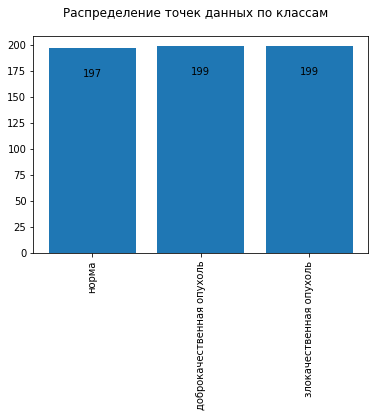

In [3]:
fig, ax = plt.subplots()
ax.bar(defs.LABELS, [NORM_N_ROWS, BENIGN_TUMOR_N_ROWS, MALIGNANT_TUMOR_N_ROWS], tick_label=defs.LABELS)
plt.xticks(rotation='vertical')
fig.suptitle('Распределение точек данных по классам')
viz.autolabel(ax, height_factor=0.85)
plt.show()

In [4]:
norm_df = pd.read_excel(NORM_PATH, index_col=0, nrows=NORM_N_ROWS)
# удаление ненужных столбцов
norm_df.pop('Дата рождения')
norm_df.pop('Дата тестирования')
norm_df.pop('Пол')
norm_df.pop('?1')
norm_df.pop('?2')
# добавление столбца с меткой
norm_df['Метка'] = [defs.LABELS[0]] * NORM_N_ROWS

benign_tumor_df = pd.read_excel(BENIGN_TUMOR_PATH, index_col=0, nrows=BENIGN_TUMOR_N_ROWS)
# удаление ненужных столбцов
benign_tumor_df.pop('Дата рождения')
benign_tumor_df.pop('Дата тестирования')
benign_tumor_df.pop('?1')
benign_tumor_df.pop('?2')
# добавление столбца с меткой
benign_tumor_df['Метка'] = [defs.LABELS[1]] * BENIGN_TUMOR_N_ROWS

malignant_tumor_df = pd.read_excel(MALIGNANT_TUMOR_PATH, index_col=0, nrows=MALIGNANT_TUMOR_N_ROWS)
# удаление ненужных столбцов
malignant_tumor_df.pop('Дата рождения')
malignant_tumor_df.pop('Дата тестирования')
malignant_tumor_df.pop('Пол')
malignant_tumor_df.pop('?1')
malignant_tumor_df.pop('?2')
# добавление столбца с меткой
malignant_tumor_df['Метка'] = [defs.LABELS[2]] * MALIGNANT_TUMOR_N_ROWS

df = pd.concat([norm_df, benign_tumor_df, malignant_tumor_df], ignore_index=True)
df.rename(columns=defs.COLUMN_NAMES, inplace=True)
df.head()

,2. Возраст,3. Семейное положение,"4. Если имеете супруга или партнера, как долго вы живете вместе (в годах)?",5. В какой семье Вы выросли?,6. Жив ли хотя бы один из Ваших родителей (да/нет)?,"7. Если да, как часто вы общаетесь?",8. Есть ли у Вас дети (да/нет)?,"9. Если да, сколько?",10. Есть ли у Вас совершеннолетние дети (да/нет)?,"11. Если да, как часто вы общаетесь?",...,27. Каков тип Вашей занятости?,28. Каковы Ваши предпочтения в пище?,29. Каков тип Вашего питания?,30. Вы курите (да/нет)?,31. Количество родов,32. Количество прерванных беременностей,33. Гинекологические заболевания (да/нет),34. Заболевания щитовидной железы (да/нет),35. Наследственность (да/нет),Метка
0,46.515068,2,21,1,да,2,да,1,да,1,...,4,1.0,1.0,нет,1,0,да,нет,нет,норма
1,45.983562,4,-,1,да,3,да,1,да,2,...,1,2.0,3.0,нет,1,0,да,нет,нет,норма
2,35.443836,1,11,1,да,3,да,1,нет,-,...,3,1.0,2.0,да,1,2,нет,нет,нет,норма
3,53.539726,4,-,1,да,2,да,2,да,2,...,1,1.0,1.0,да,2,5,нет,нет,нет,норма
4,44.115068,1,12 лет,1,да,2,да,1,да,1,...,1,2.0,1.0,нет,1,2,есть,нет,нет,норма


### 2. Возраст

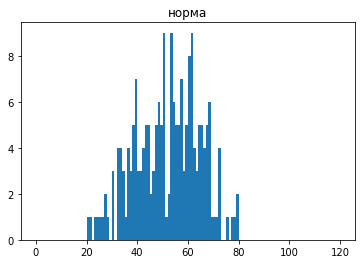

In [5]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[0]][defs.QUESTION_2].tolist(), bins=120, range=(0.0, 120.0))
ax.set_title(defs.LABELS[0])
plt.show()

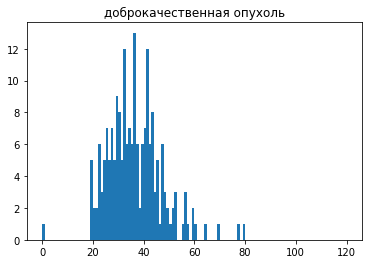

In [6]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[1]][defs.QUESTION_2].tolist(), bins=120, range=(0.0, 120.0))
ax.set_title(defs.LABELS[1])
plt.show()

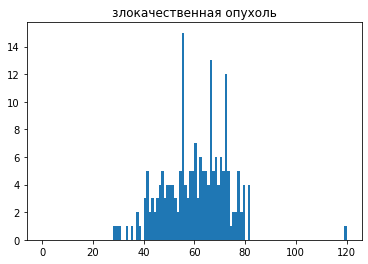

In [7]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[2]][defs.QUESTION_2].tolist(), bins=120, range=(0.0, 120.0))
ax.set_title(defs.LABELS[2])
plt.show()

### 3. Семейное положение

In [8]:
set(df[defs.QUESTION_3].tolist())

{1, 2, 3, 4, 5}

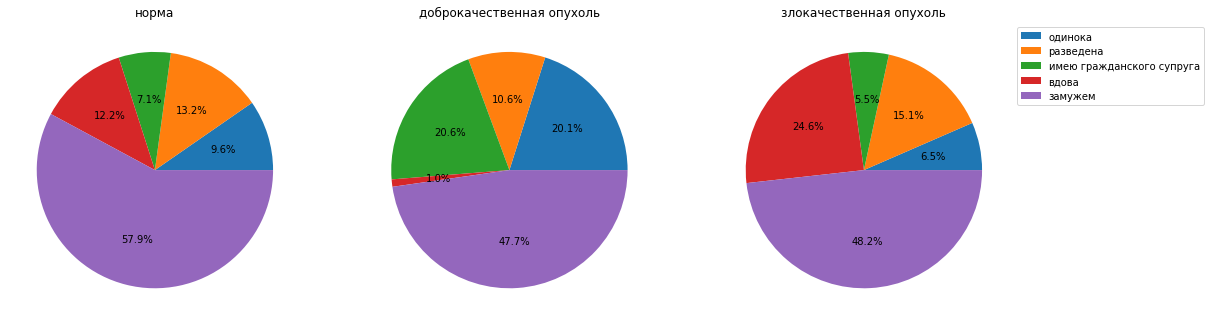

In [9]:
df.replace(
    {
        defs.QUESTION_3:
        {
            1:defs.ANSWER_3_1,
            2:defs.ANSWER_3_2,
            3:defs.ANSWER_3_3,
            4:defs.ANSWER_3_4,
            5:defs.ANSWER_3_5
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_3)

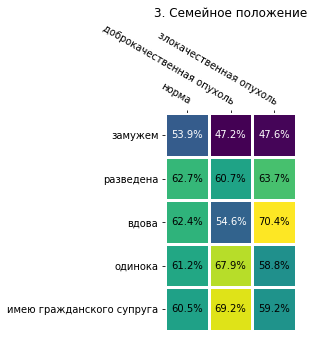

In [10]:
viz.plot_accuracy_matrix(df, defs.QUESTION_3)

### 4. Если имеете супруга или партнера, как долго вы живете вместе (в годах)?

In [11]:
set(df[defs.QUESTION_4].tolist())

{'-',
 0,
 '0 лет',
 1,
 '1 год',
 '1.5 года',
 '10 лет',
 11,
 '11 лет',
 '12 лет',
 '13 лет',
 '14 лет',
 '15 лет',
 '16 лет',
 '17 лет',
 '18 лет',
 '19 лет',
 '2 года',
 '2 года ',
 '2 месяца',
 '2,5 года',
 '20 лет',
 21,
 '21 год',
 '21 год ',
 '22 года',
 '22 года ',
 '23 года',
 '24 года',
 '25 лет',
 '26 лет',
 '26 лет ',
 '27 лет',
 '27 лет ',
 '28 лет',
 '29 лет',
 '3 года',
 '3 месяца',
 30,
 '30 лет',
 '31 год',
 '32 года',
 '33 года',
 '34 года',
 '35 лет',
 36,
 '36 лет',
 '37 лет',
 '38 лет',
 '39 лет',
 '4 года',
 '40 лет',
 '41 год',
 '42 года',
 '42 года ',
 '43 года',
 '44 года',
 '45 лет',
 '46 лет',
 '47 лет',
 '48 лет',
 '49 лет',
 '5 лет',
 '5,5 лет',
 '50 лет',
 '50 лет ',
 '51 год ',
 '52 года',
 '53 года',
 '54 года',
 '56 лет',
 '58 лет',
 '6 лет',
 '7 лет',
 '8 лет',
 '9 лет',
 '?'}

In [12]:
df.replace(
    {
        defs.QUESTION_4:
        {
            '-':0,
            '?':0
        }
    }, inplace=True
)

df[defs.QUESTION_4] = df[defs.QUESTION_4].apply(remove_no_digits)

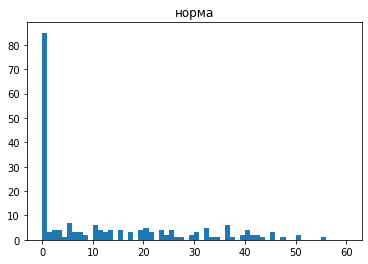

In [13]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[0]][defs.QUESTION_4].tolist(), bins=60, range=(0.0, 60.0))
ax.set_title(defs.LABELS[0])
plt.show()

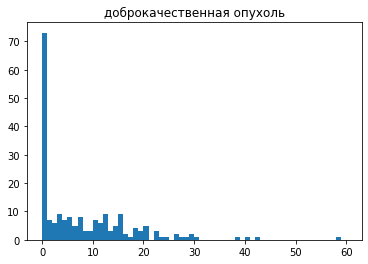

In [14]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[1]][defs.QUESTION_4].tolist(), bins=60, range=(0.0, 60.0))
ax.set_title(defs.LABELS[1])
plt.show()

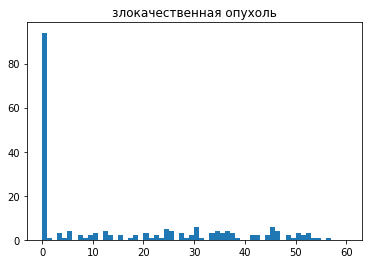

In [15]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[2]][defs.QUESTION_4].tolist(), bins=60, range=(0.0, 60.0))
ax.set_title(defs.LABELS[2])
plt.show()

### 5. В какой семье Вы выросли?

In [16]:
set(df[defs.QUESTION_5].tolist())

{'-', 1, 2, 3, 4, 5}

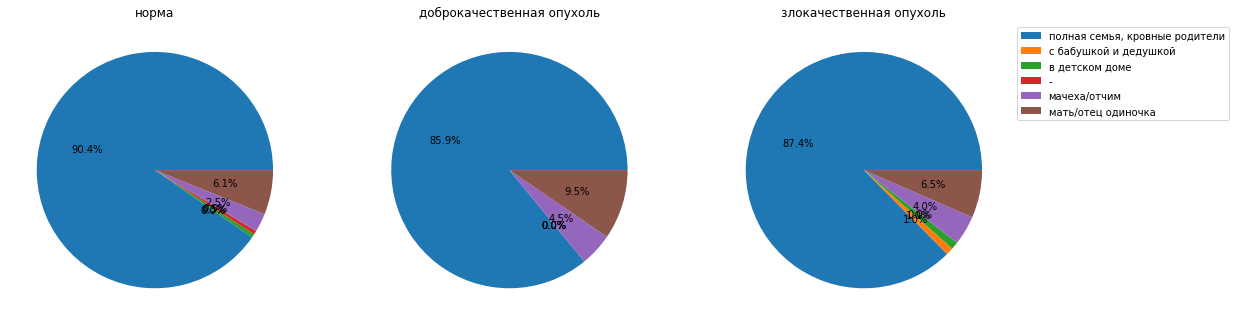

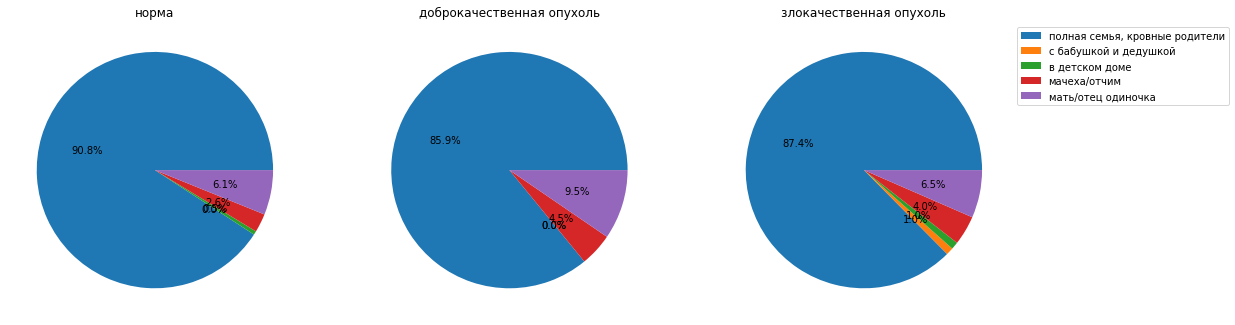

In [17]:
df.replace(
    {
        defs.QUESTION_5:
        {
            1:defs.ANSWER_5_1,
            2:defs.ANSWER_5_2,
            3:defs.ANSWER_5_3,
            4:defs.ANSWER_5_4,
            5:defs.ANSWER_5_5
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_5)
viz.plot_pies(df, defs.QUESTION_5, ignore='-')

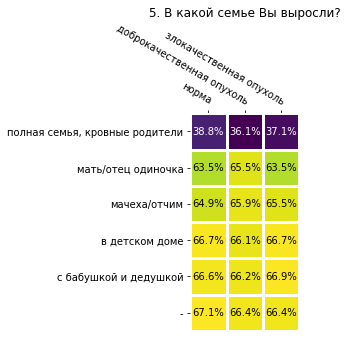

In [18]:
viz.plot_accuracy_matrix(df, defs.QUESTION_5)

In [19]:
df.replace(
    {
        defs.QUESTION_5:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 6. Жив ли хотя бы один из Ваших родителей (да/нет)?

In [20]:
set(df[defs.QUESTION_6].tolist())

{'да', 'нет', 'нет '}

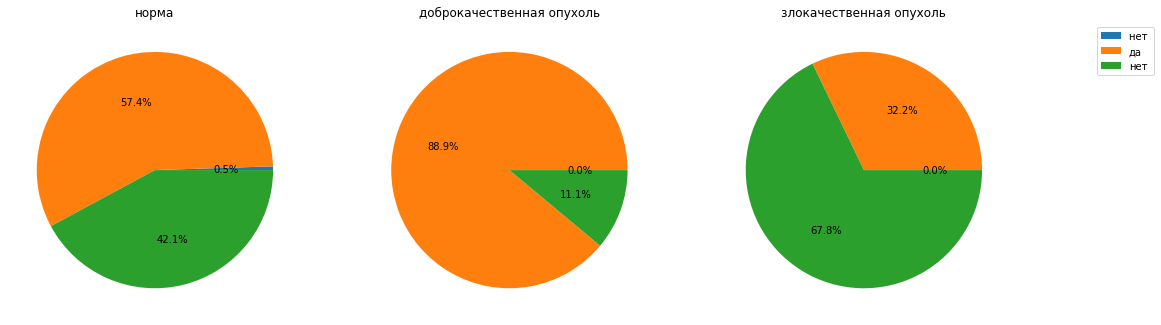

In [21]:
df.replace(
    {
        defs.QUESTION_6:
        {
            'нет':defs.NO
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_6)

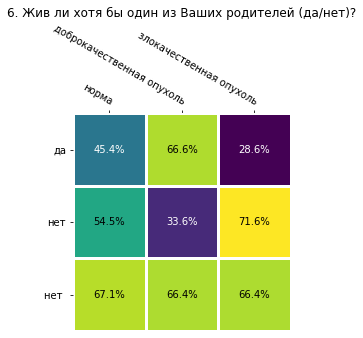

In [22]:
viz.plot_accuracy_matrix(df, defs.QUESTION_6)

### 7. Если да, как часто вы общаетесь?

In [23]:
set(df[defs.QUESTION_7].tolist())

{'-', 1, 2, 3, 4, 5, 6}

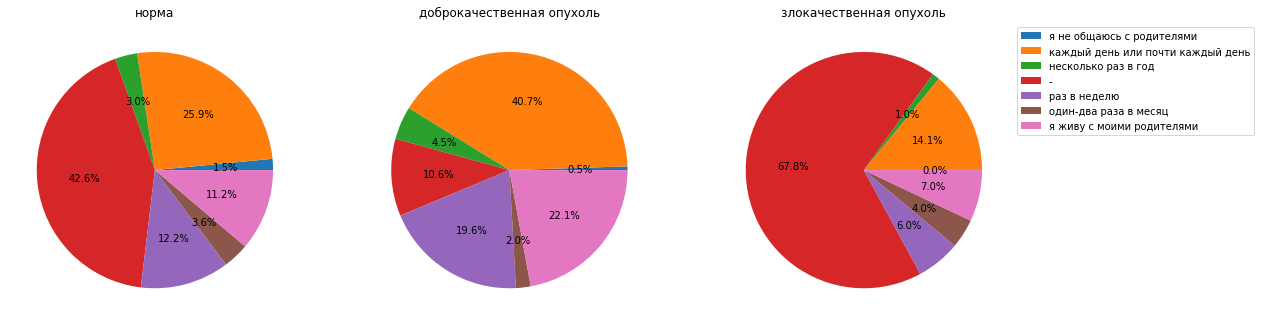

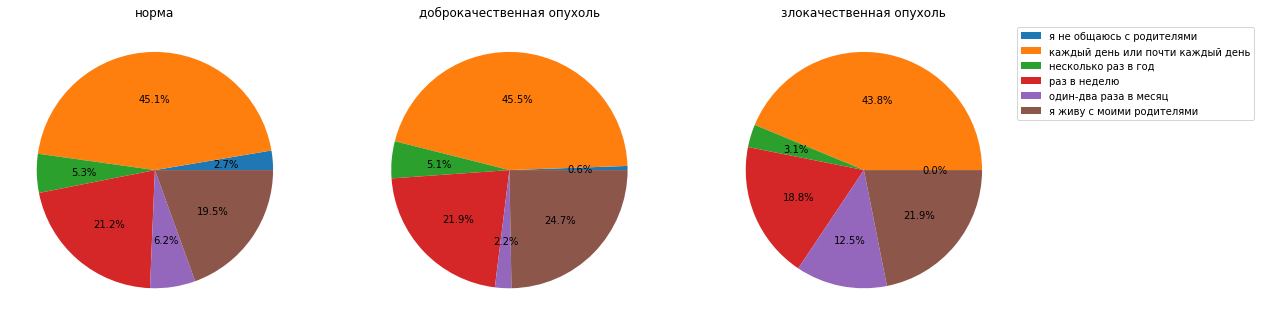

In [24]:
df.replace(
    {
        defs.QUESTION_7:
        {
            1:defs.ANSWER_7_1,
            2:defs.ANSWER_7_2,
            3:defs.ANSWER_7_3,
            4:defs.ANSWER_7_4,
            5:defs.ANSWER_7_5,
            6:defs.ANSWER_7_6
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_7)
viz.plot_pies(df, defs.QUESTION_7, ignore='-')

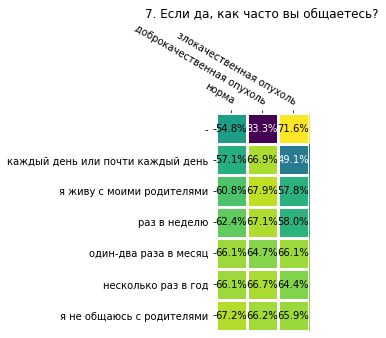

In [25]:
viz.plot_accuracy_matrix(df, defs.QUESTION_7)

In [26]:
df.replace(
    {
        defs.QUESTION_7:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 8. Есть ли у Вас дети (да/нет)?

In [27]:
set(df[defs.QUESTION_8].tolist())

{' нет', 'да', 'да ', 'нет', 'нет '}

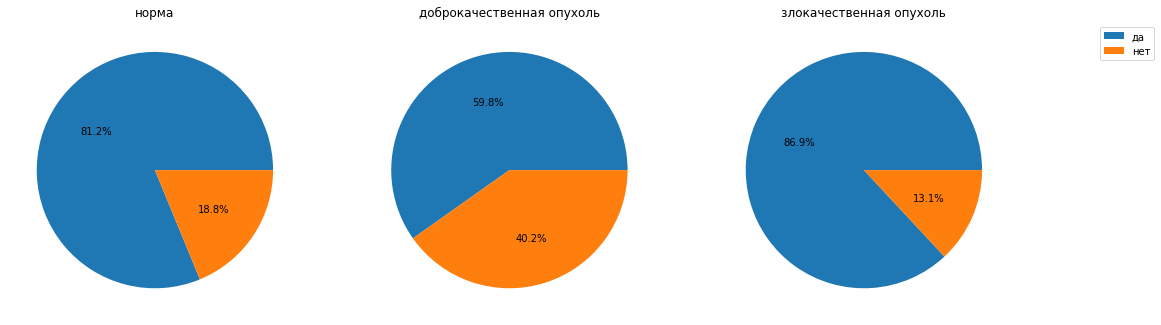

In [28]:
df.replace(
    {
        defs.QUESTION_8:
        {
            ' нет':defs.NO,
            'да ':defs.YES,
            'нет ':defs.NO
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_8)

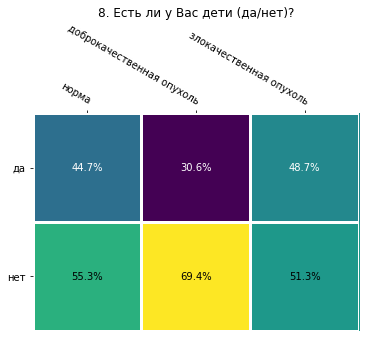

In [29]:
viz.plot_accuracy_matrix(df, defs.QUESTION_8)

### 9. Если да, сколько?

In [30]:
set(df[defs.QUESTION_9].tolist())

{' -', '-', 0, 1, 2, 3, 4, 6}

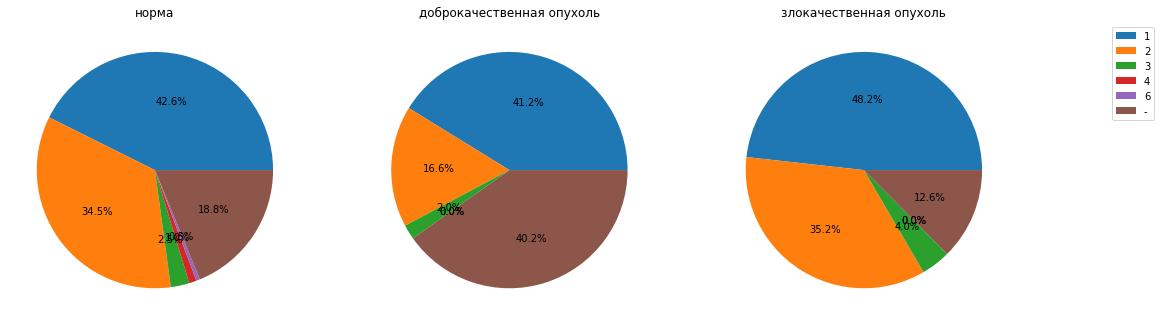

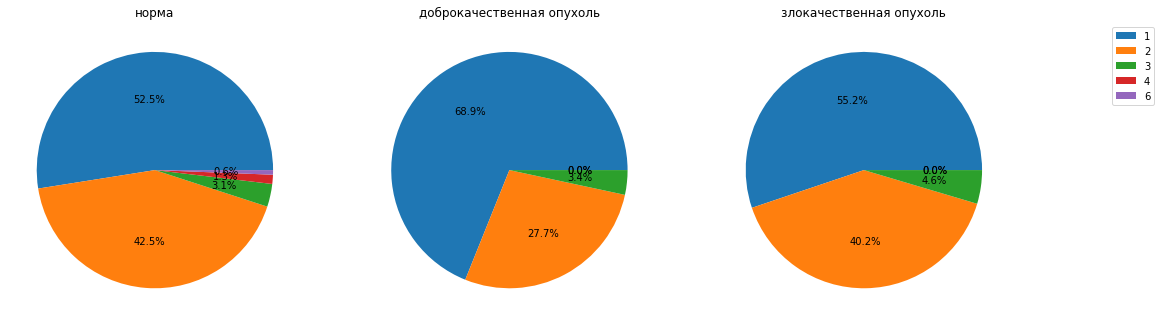

In [31]:
df.replace(
    {
        defs.QUESTION_9:
        {
            ' -':'-',
            0:'-'
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_9)
viz.plot_pies(df, defs.QUESTION_9, ignore='-')

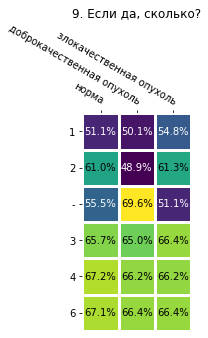

In [32]:
viz.plot_accuracy_matrix(df, defs.QUESTION_9)

In [33]:
df.replace(
    {
        defs.QUESTION_9:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 10. Есть ли у Вас совершеннолетние дети (да/нет)?

In [34]:
set(df[defs.QUESTION_10].tolist())

{' да', '-', 'да', 'да ', 'дв', 'нет'}

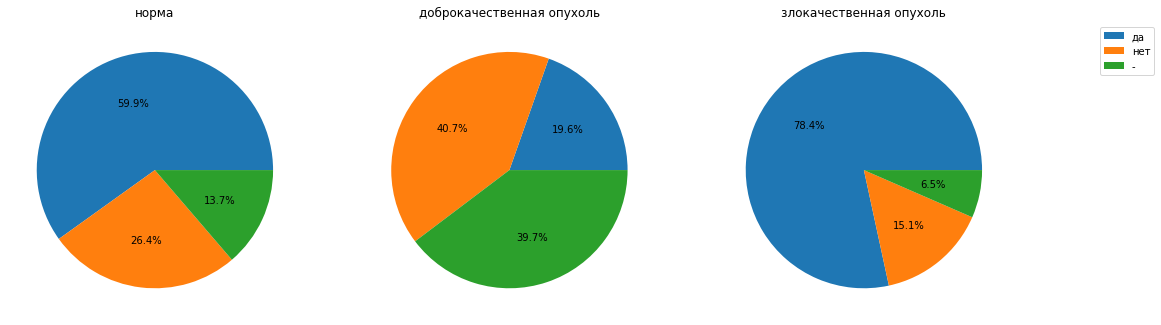

In [35]:
df.replace(
    {
        defs.QUESTION_10:
        {
            ' да':defs.YES,
            'да ':defs.YES,
            'дв':defs.YES,
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_10)

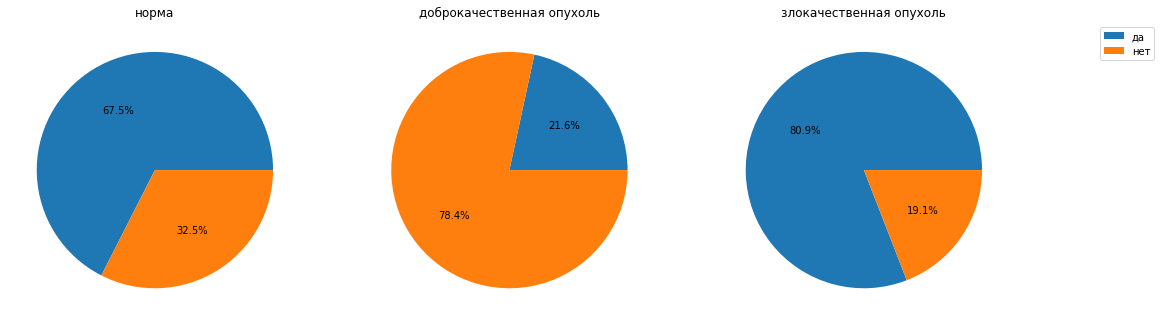

In [36]:
df[defs.QUESTION_10] = df[defs.QUESTION_11].apply(lambda x: defs.YES if x in [1, 2, 3, 4, 5] else defs.NO)
viz.plot_pies(df, defs.QUESTION_10)

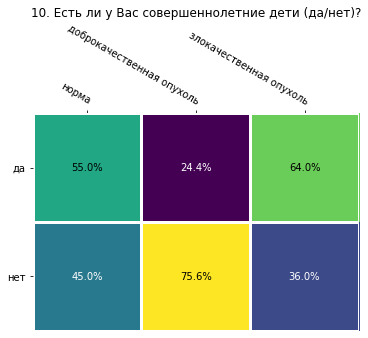

In [37]:
viz.plot_accuracy_matrix(df, defs.QUESTION_10)

### 11. Если да, как часто вы общаетесь?

In [38]:
set(df[defs.QUESTION_11].tolist())

{'-', 1, 2, 3, 4, 5, nan}

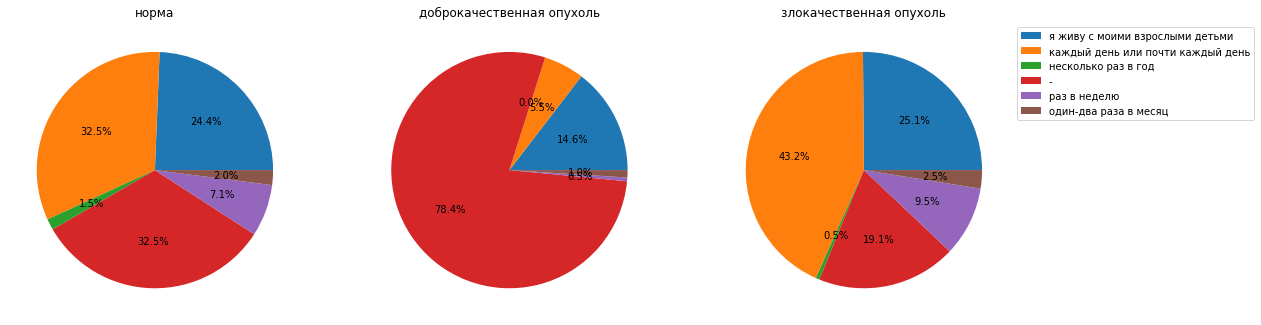

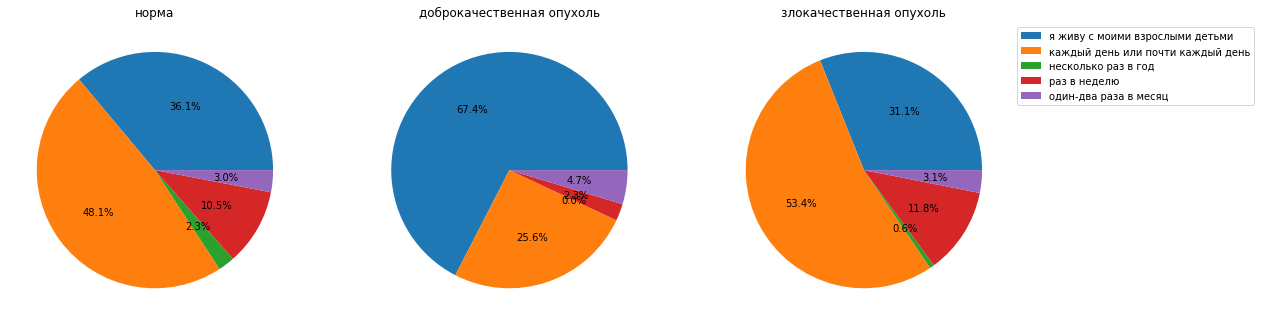

In [39]:
df.replace(
    {
        defs.QUESTION_11:
        {
            np.NaN:'-',
            1:defs.ANSWER_11_1,
            2:defs.ANSWER_11_2,
            3:defs.ANSWER_11_3,
            4:defs.ANSWER_11_4,
            5:defs.ANSWER_11_5,
            6:defs.ANSWER_11_6
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_11)
viz.plot_pies(df, defs.QUESTION_11, ignore='-')

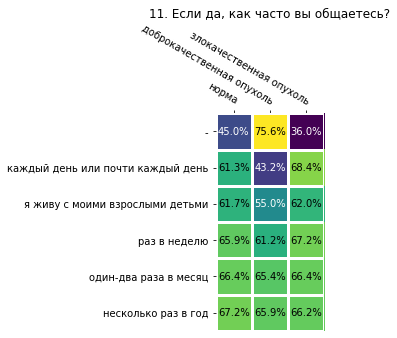

In [40]:
viz.plot_accuracy_matrix(df, defs.QUESTION_11)

In [41]:
df.replace(
    {
        defs.QUESTION_11:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 12. Сколько человек живут вместе с Вами?

In [42]:
set(df[defs.QUESTION_12].tolist())

{nan, 1.0, 2.0, 3.0, 4.0, nan}

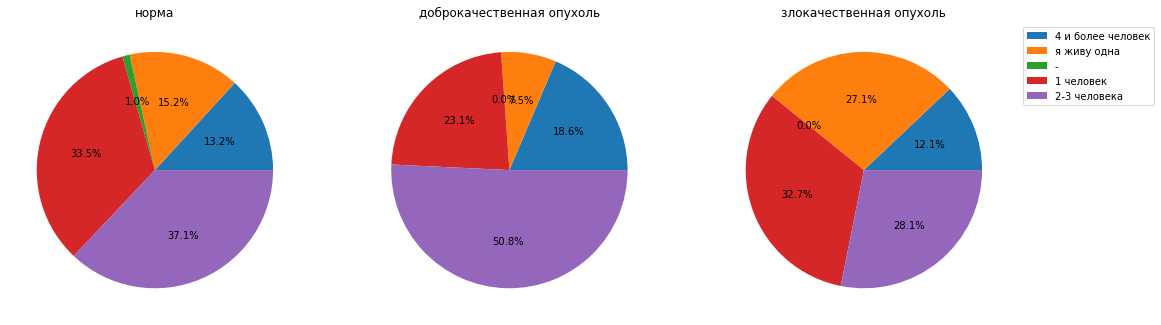

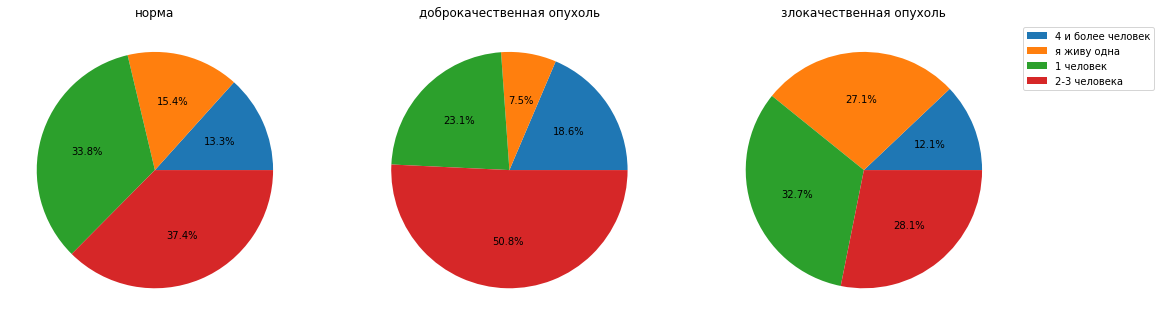

In [43]:
df.replace(
    {
        defs.QUESTION_12:
        {
            np.NaN:'-',
            1.0:defs.ANSWER_12_1,
            2.0:defs.ANSWER_12_2,
            3.0:defs.ANSWER_12_3,
            4.0:defs.ANSWER_12_4
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_12)
viz.plot_pies(df, defs.QUESTION_12, ignore='-')

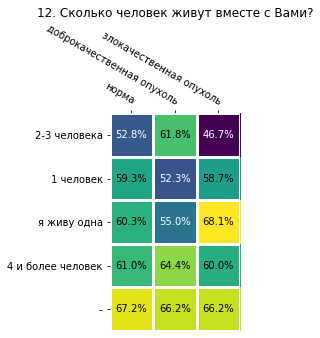

In [44]:
viz.plot_accuracy_matrix(df, defs.QUESTION_12)

In [45]:
df.replace(
    {
        defs.QUESTION_12:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 13. Каковы Ваши взаимоотношения с соседями?

In [46]:
set(df[defs.QUESTION_13].tolist())

{nan, 1.0, 2.0, 3.0, 4.0, nan, 5.0, 6.0, 7.0, 33.0}

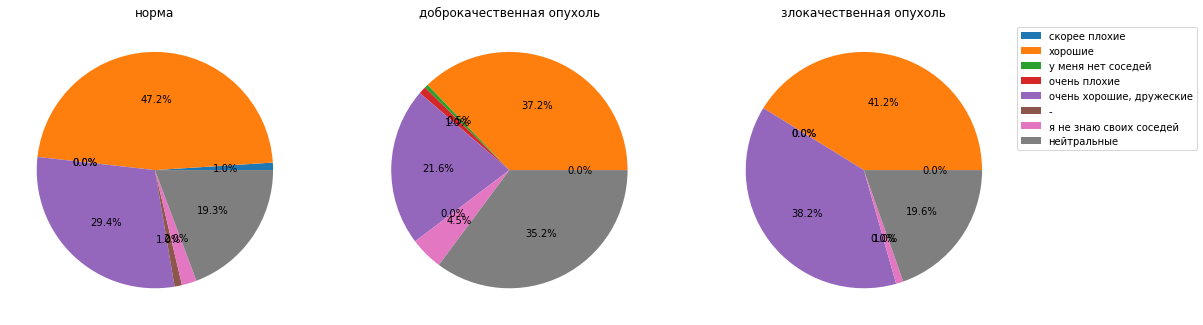

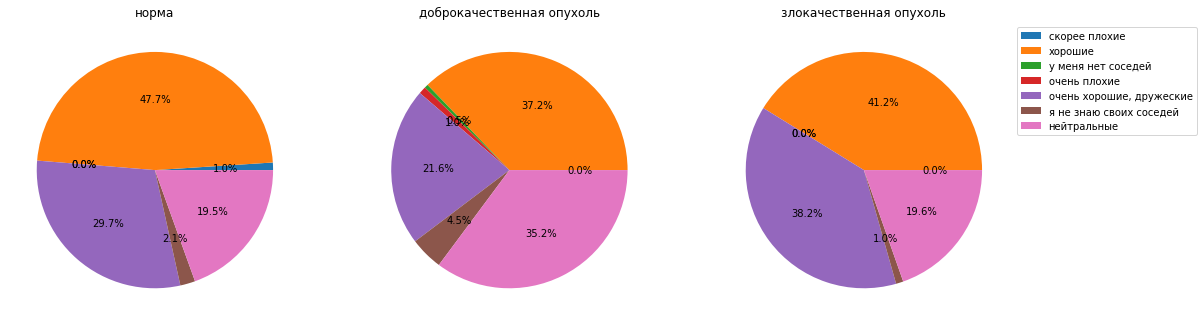

In [47]:
df.replace(
    {
        defs.QUESTION_13:
        {
            np.NaN:'-',
            1.0:defs.ANSWER_13_1,
            2.0:defs.ANSWER_13_2,
            3.0:defs.ANSWER_13_3,
            33.0:defs.ANSWER_13_3,
            4.0:defs.ANSWER_13_4,
            5.0:defs.ANSWER_13_5,
            6.0:defs.ANSWER_13_6,
            7.0:defs.ANSWER_13_7
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_13)
viz.plot_pies(df, defs.QUESTION_13, ignore='-')

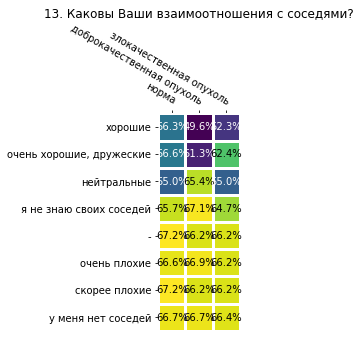

In [48]:
viz.plot_accuracy_matrix(df, defs.QUESTION_13)

In [49]:
df.replace(
    {
        defs.QUESTION_13:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 14. Как часто Вы встречаетесь с друзьями?

In [50]:
set(df[defs.QUESTION_14].tolist())

{nan, 1.0, 2.0, 3.0, 4.0, nan}

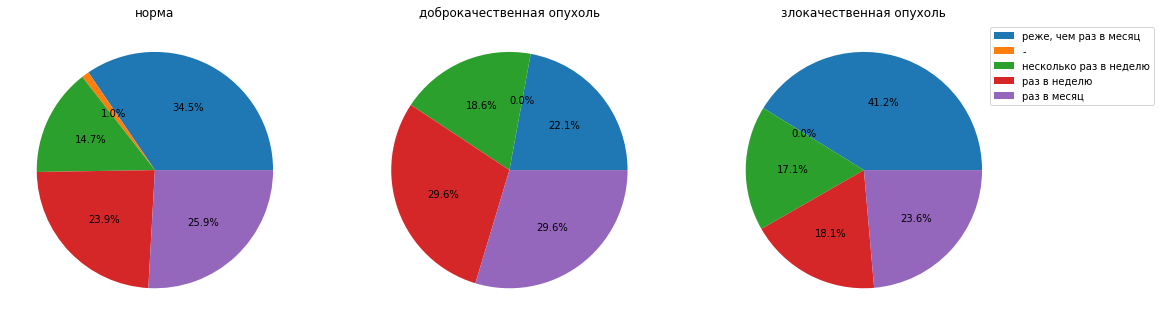

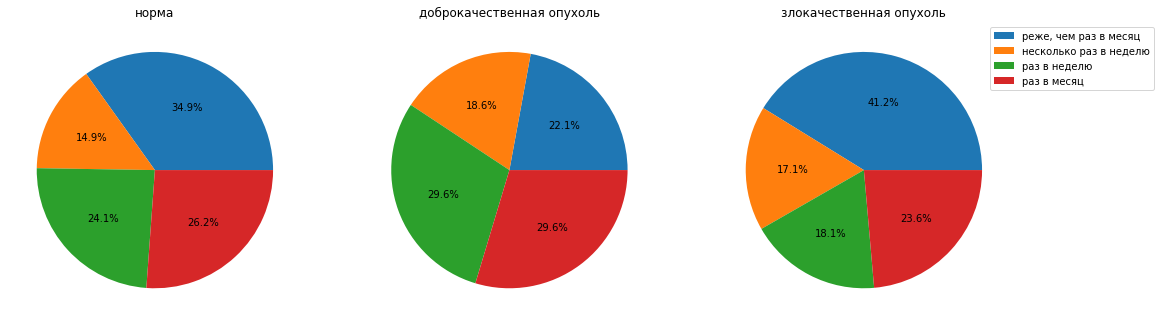

In [51]:
df.replace(
    {
        defs.QUESTION_14:
        {
            np.NaN:'-',
            1.0:defs.ANSWER_14_1,
            2.0:defs.ANSWER_14_2,
            3.0:defs.ANSWER_14_3,
            4.0:defs.ANSWER_14_4
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_14)
viz.plot_pies(df, defs.QUESTION_14, ignore='-')

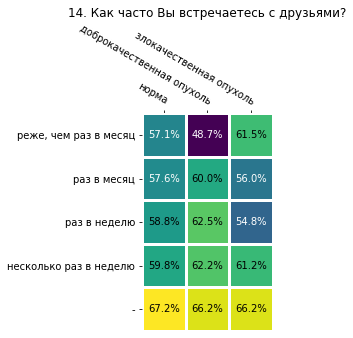

In [52]:
viz.plot_accuracy_matrix(df, defs.QUESTION_14)

In [53]:
df.replace(
    {
        defs.QUESTION_14:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 15. Есть ли у Вас домашние питомцы (да/нет)?

In [54]:
set(df[defs.QUESTION_15].tolist())

{'-', nan, 'да', 'да ', 'ла', 'нет'}

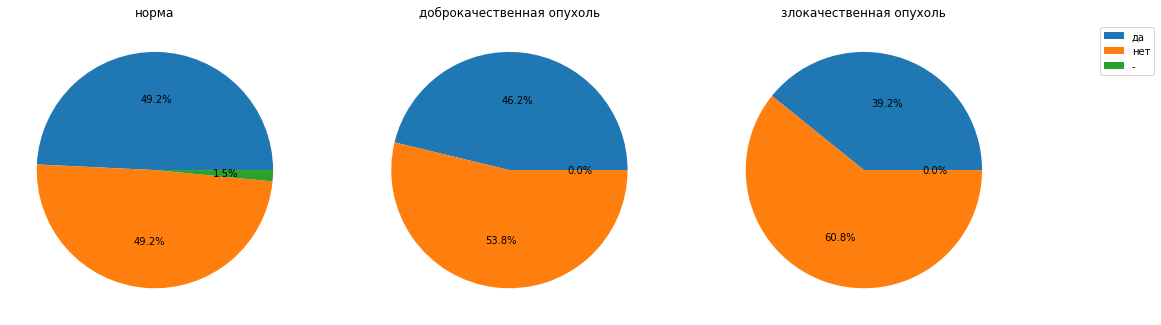

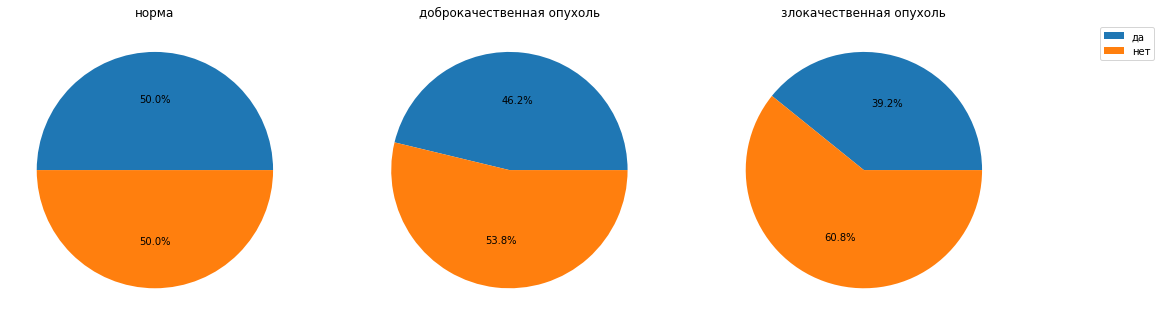

In [55]:
df.replace(
    {
        defs.QUESTION_15:
        {
            np.NaN:'-',
            'да ':defs.YES,
            'ла':defs.YES
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_15)
viz.plot_pies(df, defs.QUESTION_15, ignore='-')

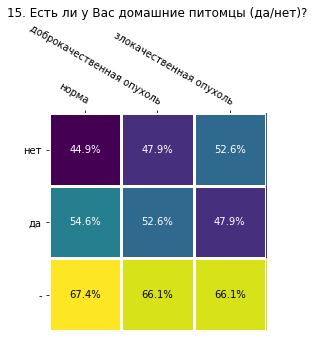

In [56]:
viz.plot_accuracy_matrix(df, defs.QUESTION_15)

In [57]:
df.replace(
    {
        defs.QUESTION_15:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 16. В течение последних 7 дней, как часто Вы практиковали тяжелые физические нагрузки?

In [58]:
set(df[defs.QUESTION_16].tolist())

{'-', 0, 1, 2, 3, 4, 5, 6, 7, nan}

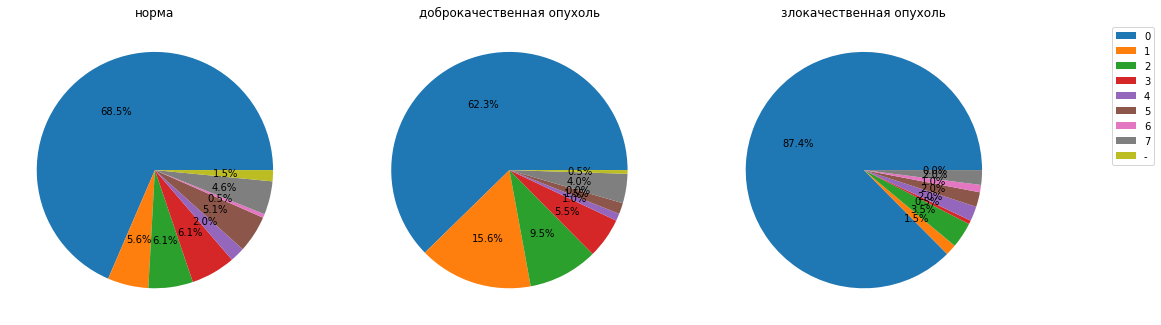

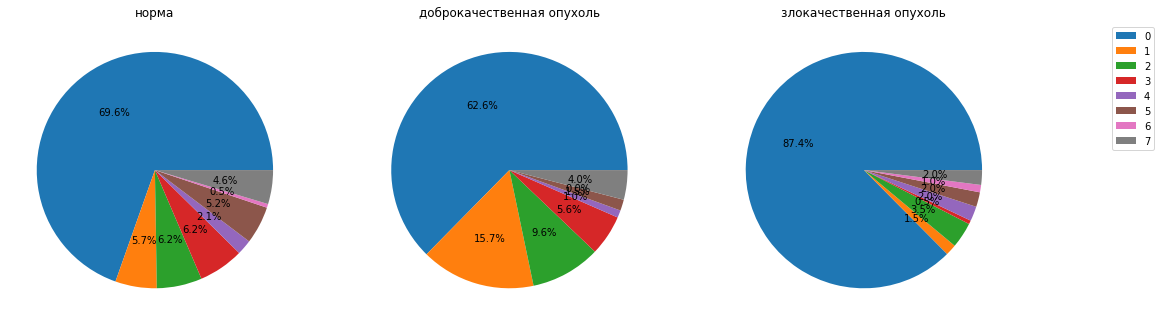

In [59]:
df.replace(
    {
        defs.QUESTION_16:
        {
            np.NaN:'-'
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_16)
viz.plot_pies(df, defs.QUESTION_16, ignore='-')

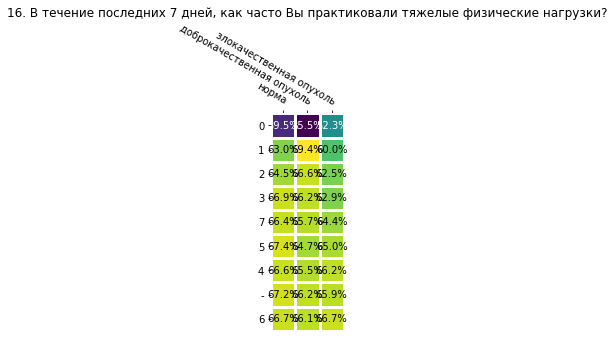

In [60]:
viz.plot_accuracy_matrix(df, defs.QUESTION_16)

In [61]:
df.replace(
    {
        defs.QUESTION_16:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 17. В течение последних 7 дней, как часто Вы практиковали умеренные физические нагрузки?

In [62]:
set(df[defs.QUESTION_17].tolist())

{'-', 0, 1, 2, 3, 4, 5, 6, 7, nan}

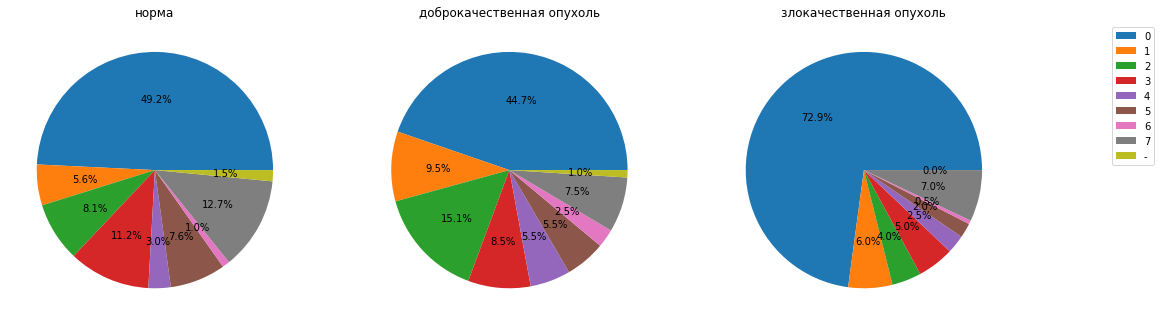

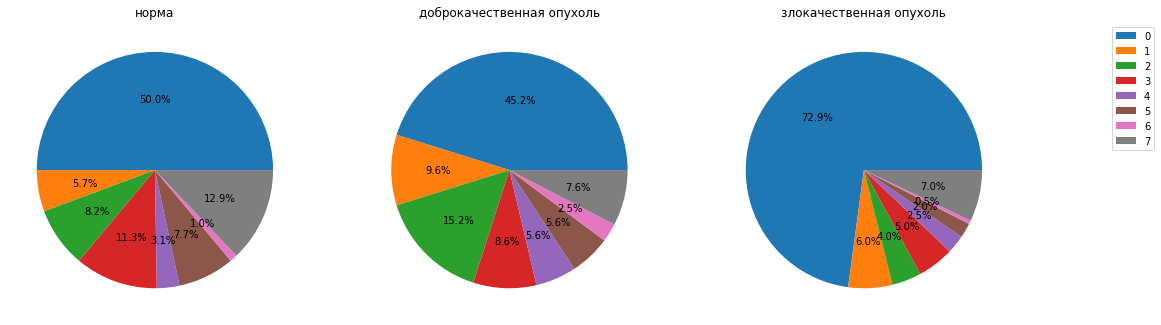

In [63]:
df.replace(
    {
        defs.QUESTION_17:
        {
            np.NaN:'-'
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_17)
viz.plot_pies(df, defs.QUESTION_17, ignore='-')

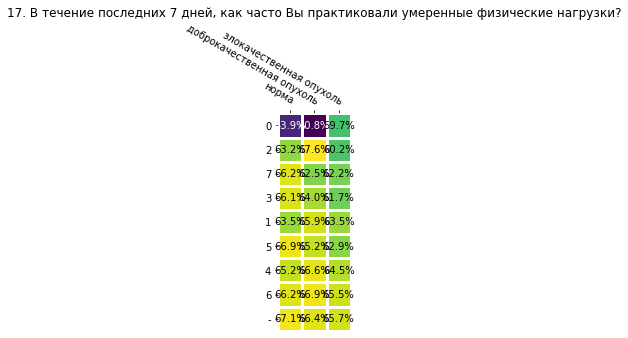

In [64]:
viz.plot_accuracy_matrix(df, defs.QUESTION_17)

In [65]:
df.replace(
    {
        defs.QUESTION_17:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 18. В течение последних 7 дней, как часто Вы ходили пешком минимум 10 минут без перерыва?

In [66]:
set(df[defs.QUESTION_18].tolist())

{'-', 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan, nan}

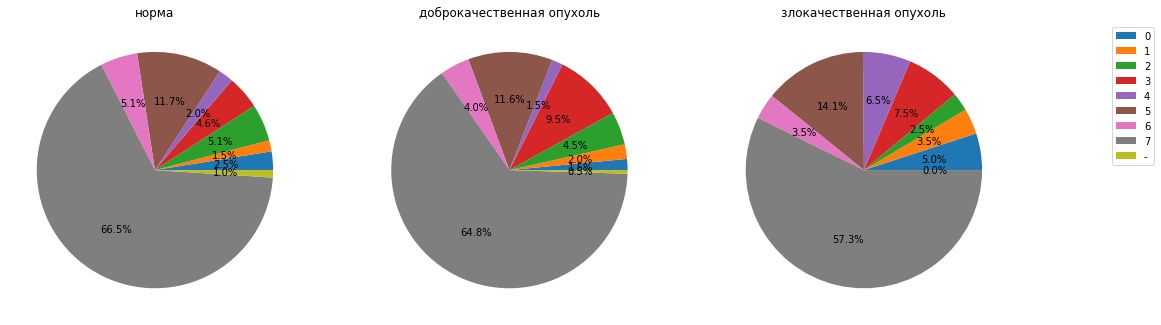

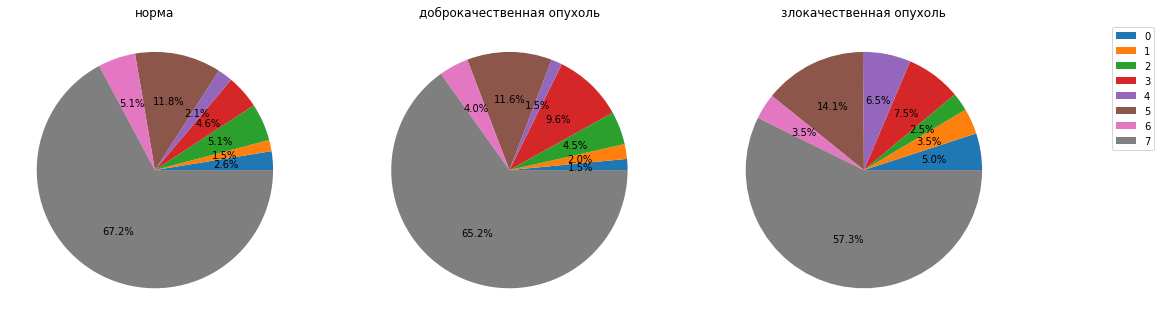

In [67]:
df.replace(
    {
        defs.QUESTION_18:
        {
            np.NaN:'-',
            0.0:0,
            1.0:1,
            2.0:2,
            3.0:3,
            4.0:4,
            5.0:5,
            6.0:6,
            7.0:7,
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_18)
viz.plot_pies(df, defs.QUESTION_18, ignore='-')

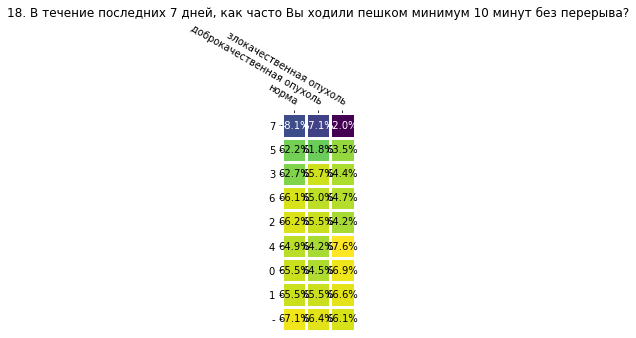

In [68]:
viz.plot_accuracy_matrix(df, defs.QUESTION_18)

In [69]:
df.replace(
    {
        defs.QUESTION_18:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 19. Уровень Вашего образования?

In [70]:
set(df[defs.QUESTION_19].tolist())

{nan, 1.0, 2.0, 3.0, 4.0, nan}

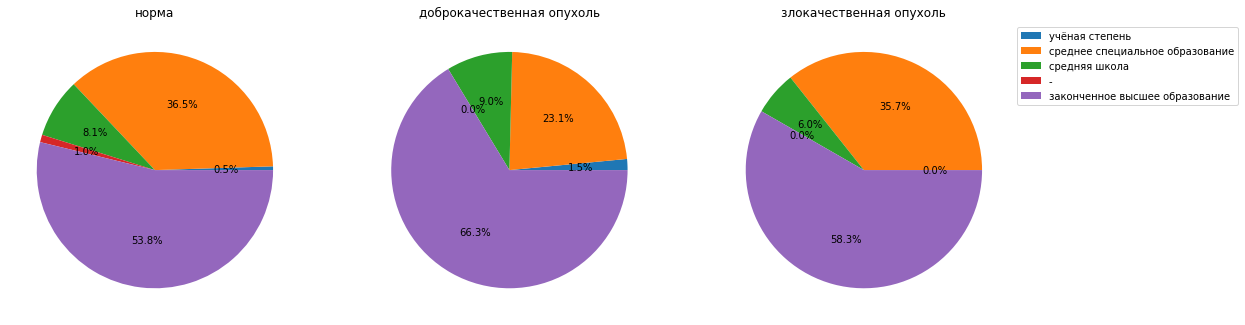

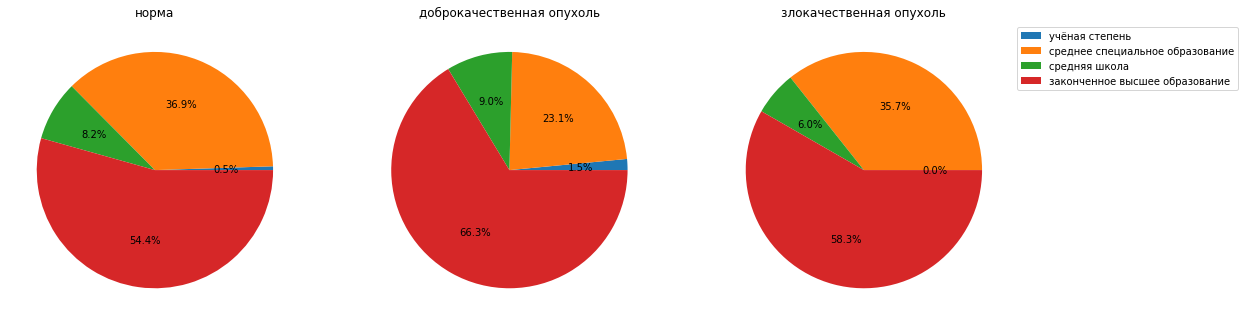

In [71]:
df.replace(
    {
        defs.QUESTION_19:
        {
            np.NaN:'-',
            1.0:defs.ANSWER_19_20_1,
            2.0:defs.ANSWER_19_20_2,
            3.0:defs.ANSWER_19_20_3,
            4.0:defs.ANSWER_19_20_4
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_19)
viz.plot_pies(df, defs.QUESTION_19, ignore='-')

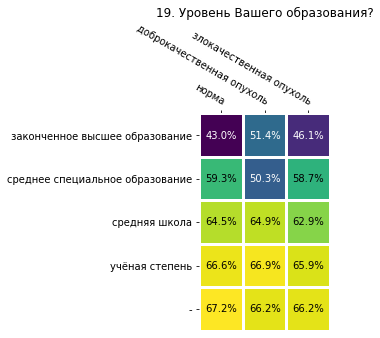

In [72]:
viz.plot_accuracy_matrix(df, defs.QUESTION_19)

In [73]:
df.replace(
    {
        defs.QUESTION_19:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 20. Каков уровень образования Вашего партнера (если применимо)?

In [74]:
set(df[defs.QUESTION_20].tolist())

{'-', 1, 2, 3, 4, nan}

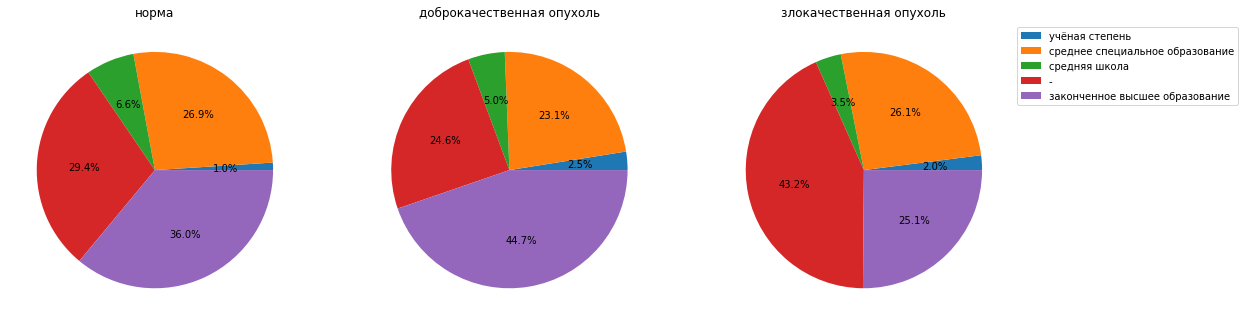

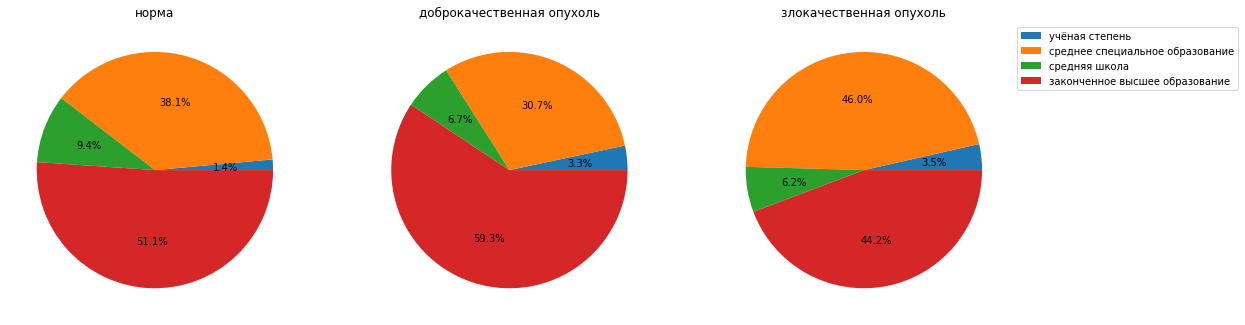

In [75]:
df.replace(
    {
        defs.QUESTION_20:
        {
            np.NaN:'-',
            1:defs.ANSWER_19_20_1,
            2:defs.ANSWER_19_20_2,
            3:defs.ANSWER_19_20_3,
            4:defs.ANSWER_19_20_4
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_20)
viz.plot_pies(df, defs.QUESTION_20, ignore='-')

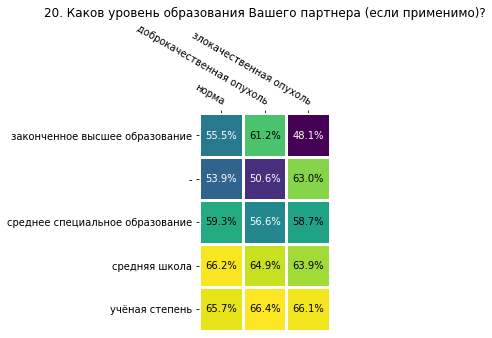

In [76]:
viz.plot_accuracy_matrix(df, defs.QUESTION_20)

In [77]:
df.replace(
    {
        defs.QUESTION_20:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 22. Как долго Вы проживаете в этом месте (в годах)?

In [78]:
set(df[defs.QUESTION_22].tolist())

{'-',
 0.5,
 '1 год',
 '1 год ',
 '1 месяц',
 '1,5 ГОДА',
 '10 лет',
 '10 лет ',
 11,
 '11 лет',
 '11 лет ',
 '12 лет',
 '12 лет ',
 '13 лет',
 14,
 '14 лет',
 '15 лет',
 '15 лет ',
 '16 лет',
 '17 лет',
 '18 лет',
 '19 лет',
 '2 года',
 '2 года ',
 '2,5 года',
 '2.5 года',
 '20 лет',
 '21 год',
 '22 года',
 '23 года',
 '24 года',
 '25 лет',
 '26 лет',
 '27 лет',
 '28 года',
 '28 лет',
 '29 лет',
 '3 года',
 '3 года ',
 '3.5 года',
 30,
 '30 лет',
 '30 лет ',
 '31 год',
 '32 года',
 '33 года',
 '33 года ',
 34,
 '34 года',
 '35 лет',
 '36 лет',
 '37 лет',
 '38 лет',
 '39 лет',
 '4 года',
 '4 года ',
 '4 лет',
 '40 лет',
 '41 год',
 42,
 '42 года',
 '42года',
 '43 года',
 '43 года ',
 '44 года',
 '45 лет',
 '45 лет ',
 '46 лет',
 '47 лет',
 '48 лет',
 '49 лет',
 '5 лет',
 '50 лет',
 '52 года',
 '53 года',
 '54 года',
 '55 лет',
 '55 лет ',
 '56 лет',
 '57 лет',
 '58 лет',
 '59 лет',
 '6 лет',
 '6 месяцев',
 '60 лет',
 '61 год',
 '61 год ',
 '63 года',
 '64 года',
 '65 лет',
 '66 лет',
 

In [79]:
df.replace(
    {
        defs.QUESTION_22:
        {
            '-':0,
            '?':0,
            np.NaN:0
        }
    }, inplace=True
)
df[defs.QUESTION_22] = df[defs.QUESTION_22].apply(remove_no_digits)

In [80]:
set(df[defs.QUESTION_22].tolist())

{0.0,
 0.5,
 1.0,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 72.0,
 73.0,
 77.0,
 79.0}

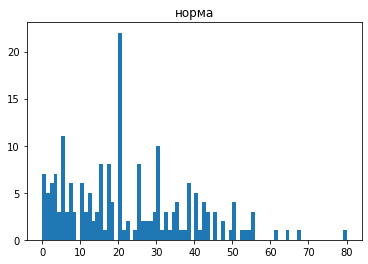

In [81]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[0]][defs.QUESTION_22].tolist(), bins=80, range=(0.0, 80.0))
ax.set_title(defs.LABELS[0])
plt.show()

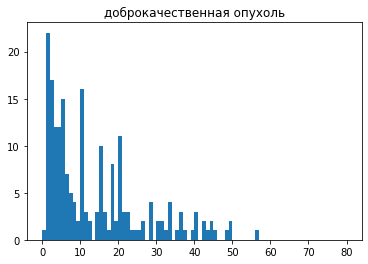

In [82]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[1]][defs.QUESTION_22].tolist(), bins=80, range=(0.0, 80.0))
ax.set_title(defs.LABELS[1])
plt.show()

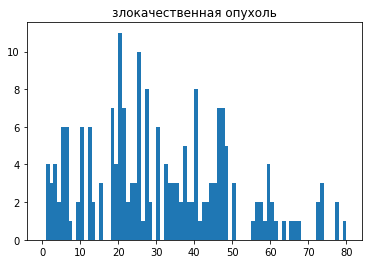

In [83]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[2]][defs.QUESTION_22].tolist(), bins=80, range=(0.0, 80.0))
ax.set_title(defs.LABELS[2])
plt.show()

### 23. Каков тип Вашего дома?

In [84]:
set(df[defs.QUESTION_23].tolist())

{nan, 1.0, 2.0, 3.0, nan}

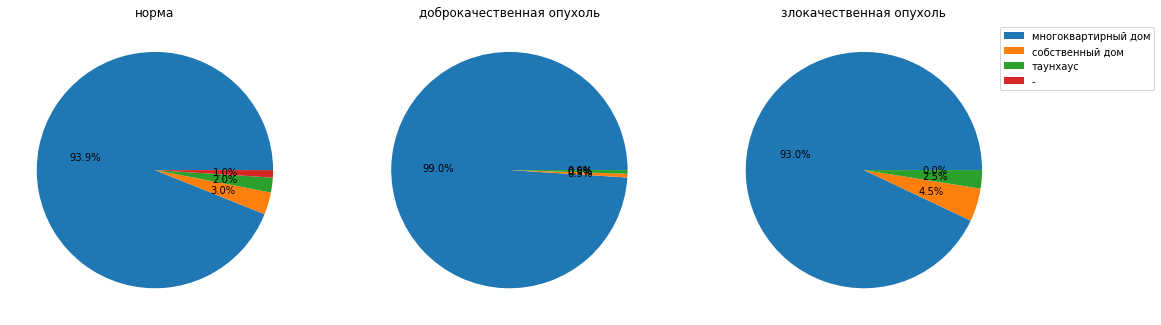

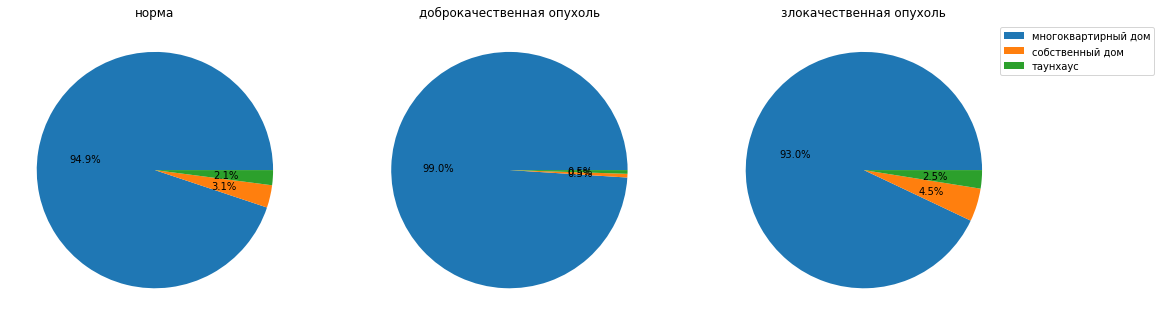

In [85]:
df.replace(
    {
        defs.QUESTION_23:
        {
            np.NaN:'-',
            1.0:defs.ANSWER_23_1,
            2.0:defs.ANSWER_23_2,
            3.0:defs.ANSWER_23_3
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_23)
viz.plot_pies(df, defs.QUESTION_23, ignore='-')

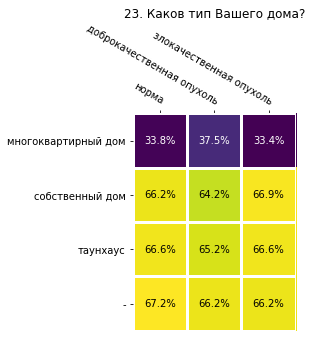

In [86]:
viz.plot_accuracy_matrix(df, defs.QUESTION_23)

In [87]:
df.replace(
    {
        defs.QUESTION_23:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 24. Если Вы живете в многоквартирном доме, то на каком этаже?

In [88]:
set(df[defs.QUESTION_24].tolist())

{'-',
 0,
 1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 2,
 20,
 22,
 23,
 25,
 3,
 4,
 40,
 5,
 6,
 7,
 8,
 9,
 '?',
 nan}

In [89]:
df.replace(
    {
        defs.QUESTION_24:
        {
            '-':0,
            '?':0,
            np.NaN:0
        }
    }, inplace=True
)
df[defs.QUESTION_24] = df[defs.QUESTION_24].apply(remove_no_digits)

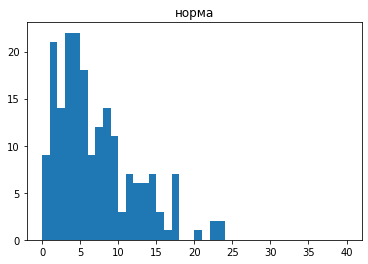

In [90]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[0]][defs.QUESTION_24].tolist(), bins=40, range=(0.0, 40.0))
ax.set_title(defs.LABELS[0])
plt.show()

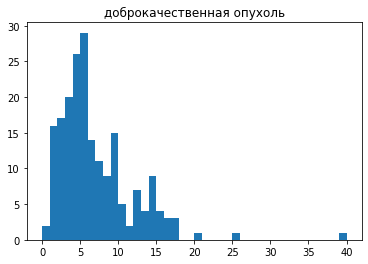

In [91]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[1]][defs.QUESTION_24].tolist(), bins=40, range=(0.0, 40.0))
ax.set_title(defs.LABELS[1])
plt.show()

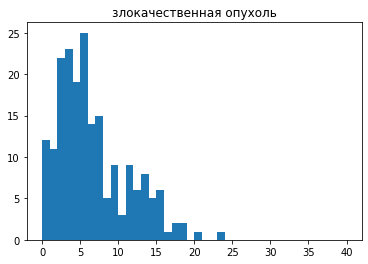

In [92]:
ax = plt.subplot()
ax.hist(df[df['Метка'] == defs.LABELS[2]][defs.QUESTION_24].tolist(), bins=40, range=(0.0, 40.0))
ax.set_title(defs.LABELS[2])
plt.show()

### 25. Каким транспортом Вы обычно пользуетесь?

In [93]:
set(df[defs.QUESTION_25].tolist())

{'-', 1.0, 2.0, 3.0, nan, nan}

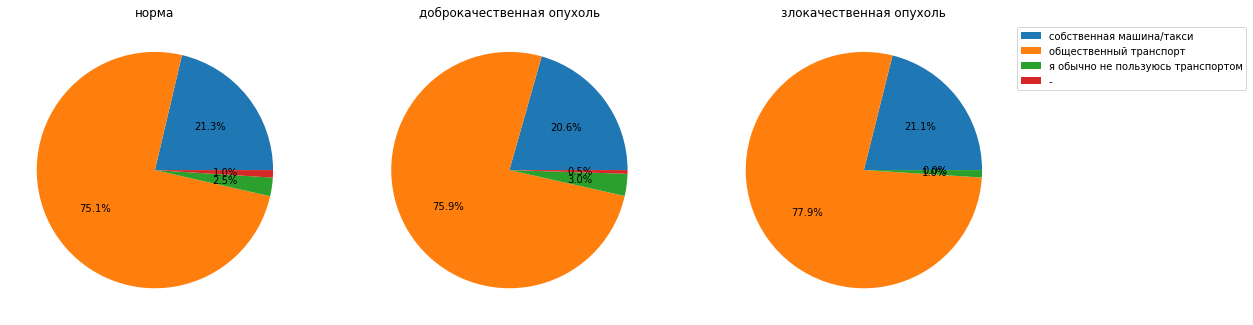

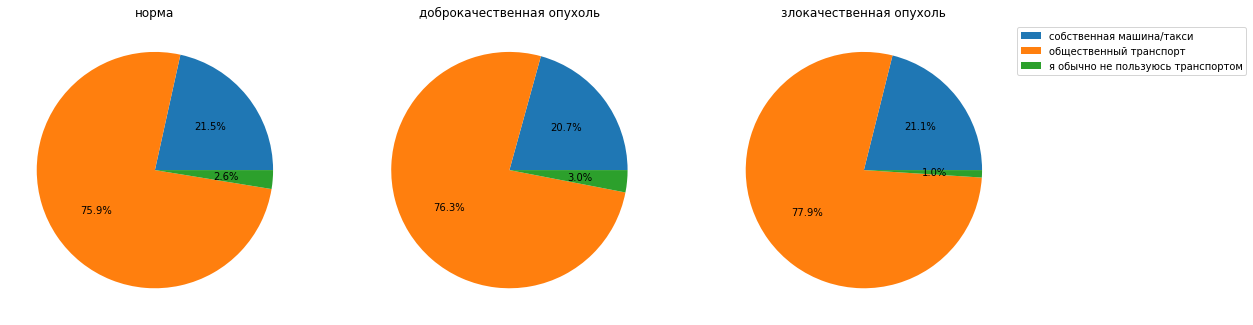

In [94]:
df.replace(
    {
        defs.QUESTION_25:
        {
            np.NaN:'-',
            1.0:defs.ANSWER_25_1,
            2.0:defs.ANSWER_25_2,
            3.0:defs.ANSWER_25_3
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_25)
viz.plot_pies(df, defs.QUESTION_25, ignore='-')

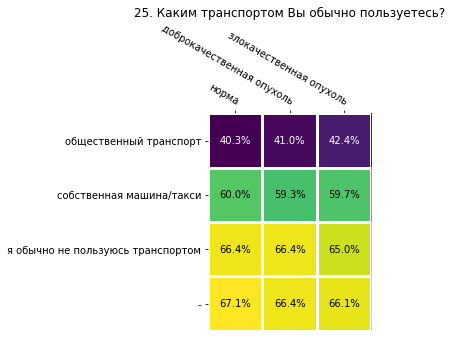

In [95]:
viz.plot_accuracy_matrix(df, defs.QUESTION_25)

In [96]:
df.replace(
    {
        defs.QUESTION_25:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 26. Сколько времени занимает Ваш путь до работы в одну сторону?

In [97]:
set(df[defs.QUESTION_26].tolist())

{'-', 1, 2, 3, 4, nan}

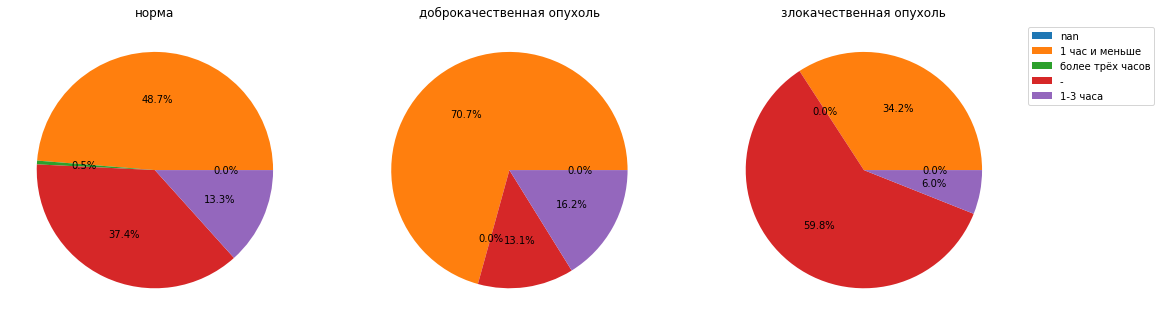

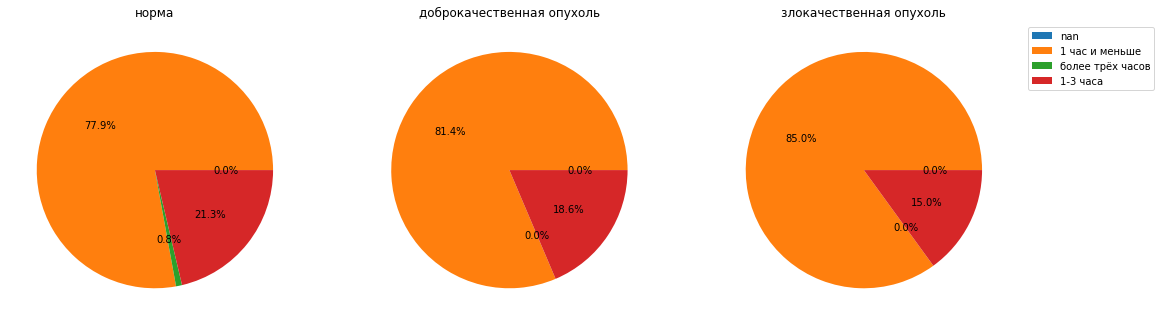

In [98]:
df.replace(
    {
        defs.QUESTION_26:
        {
            1:defs.ANSWER_26_1,
            2:defs.ANSWER_26_2,
            3:defs.ANSWER_26_3,
            4:np.NaN
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_26)
viz.plot_pies(df, defs.QUESTION_26, ignore='-')

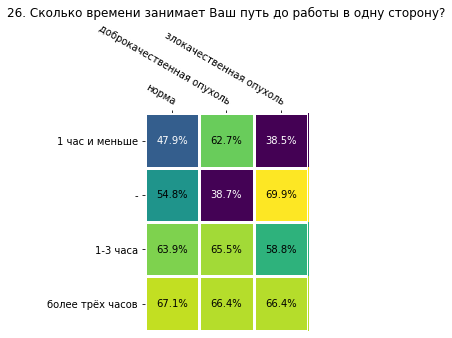

In [99]:
viz.plot_accuracy_matrix(df, defs.QUESTION_26)

In [100]:
df.replace(
    {
        defs.QUESTION_26:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 27. Каков тип Вашей занятости?

In [101]:
set(df[defs.QUESTION_27].tolist())

{'-', 1, 2, 3, 4, nan}

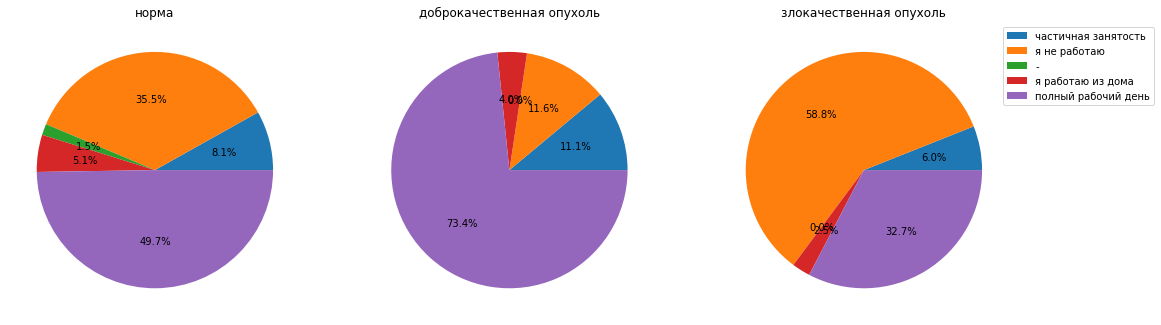

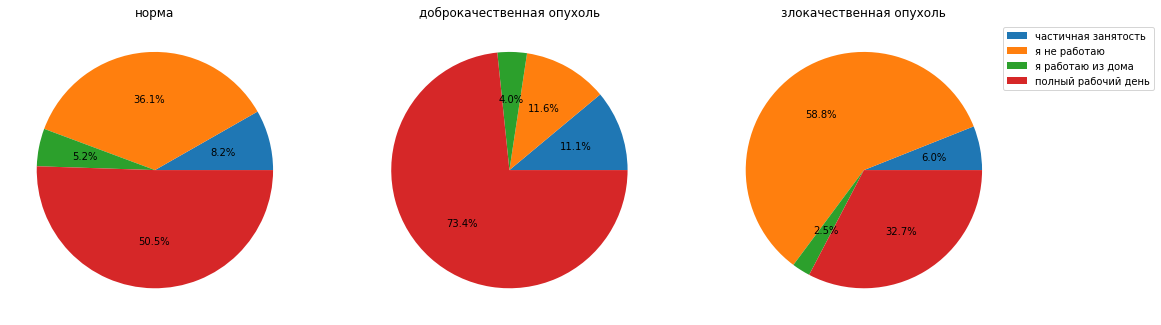

In [102]:
df.replace(
    {
        defs.QUESTION_27:
        {
            np.NaN:'-',
            1:defs.ANSWER_27_1,
            2:defs.ANSWER_27_2,
            3:defs.ANSWER_27_3,
            4:defs.ANSWER_27_4
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_27)
viz.plot_pies(df, defs.QUESTION_27, ignore='-')

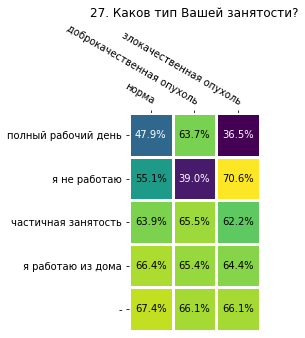

In [103]:
viz.plot_accuracy_matrix(df, defs.QUESTION_27)

In [104]:
df.replace(
    {
        defs.QUESTION_27:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 28. Каковы Ваши предпочтения в пище?

In [105]:
set(df[defs.QUESTION_28].tolist())

{nan, 1.0, 2.0, 3.0, nan, 4.0}

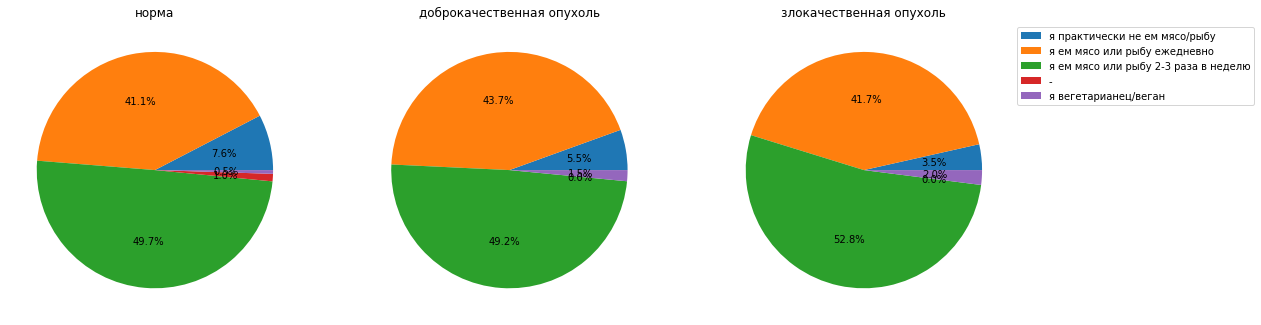

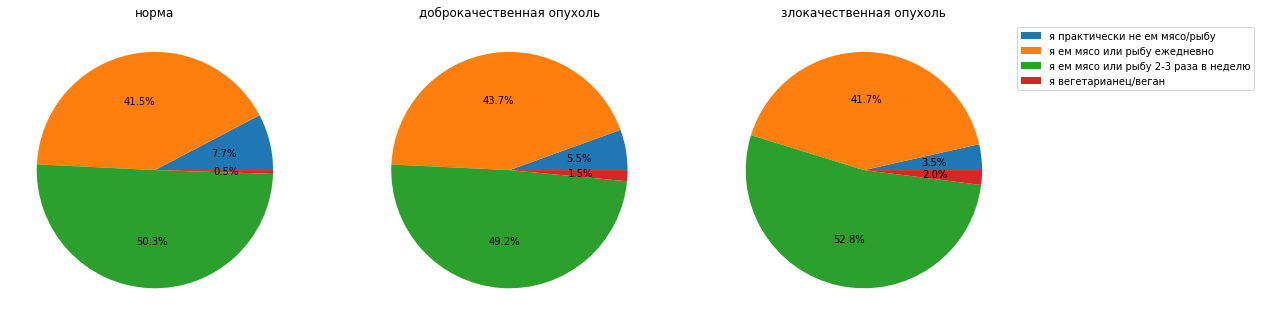

In [106]:
df.replace(
    {
        defs.QUESTION_28:
        {
            np.NaN:'-',
            1.0:defs.ANSWER_28_1,
            2.0:defs.ANSWER_28_2,
            3.0:defs.ANSWER_28_3,
            4.0:defs.ANSWER_28_4
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_28)
viz.plot_pies(df, defs.QUESTION_28, ignore='-')

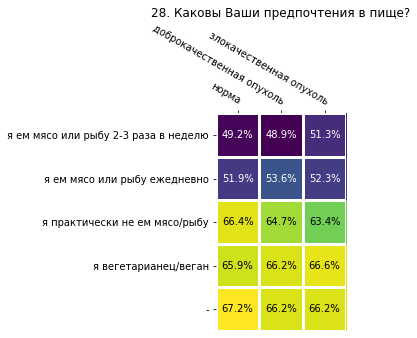

In [107]:
viz.plot_accuracy_matrix(df, defs.QUESTION_28)

In [108]:
df.replace(
    {
        defs.QUESTION_28:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 29. Каков тип Вашего питания?

In [109]:
set(df[defs.QUESTION_29].tolist())

{nan, 1.0, 2.0, 3.0, 4.0, nan}

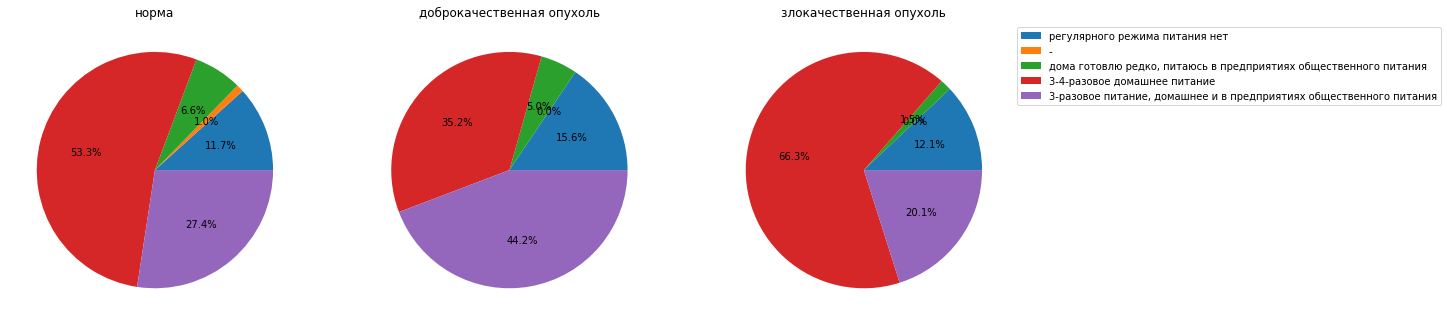

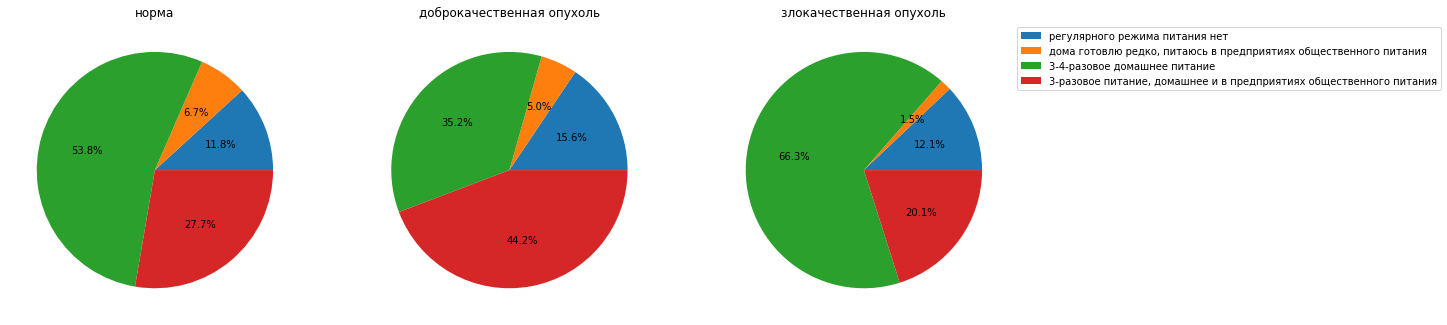

In [110]:
df.replace(
    {
        defs.QUESTION_29:
        {
            np.NaN:'-',
            1.0:defs.ANSWER_29_1,
            2.0:defs.ANSWER_29_2,
            3.0:defs.ANSWER_29_3,
            4.0:defs.ANSWER_29_4
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_29)
viz.plot_pies(df, defs.QUESTION_29, ignore='-')

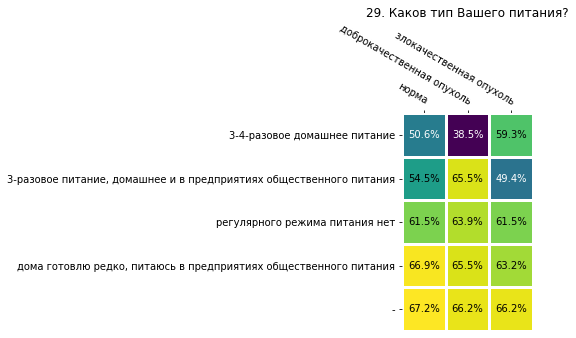

In [111]:
viz.plot_accuracy_matrix(df, defs.QUESTION_29)

In [112]:
df.replace(
    {
        defs.QUESTION_29:
        {
            '-':np.NaN
        }
    }, inplace=True
)

### 30. Вы курите (да/нет)?

In [113]:
set(df[defs.QUESTION_30].tolist())

{nan, 'да', 'не т', 'нет', 'нет '}

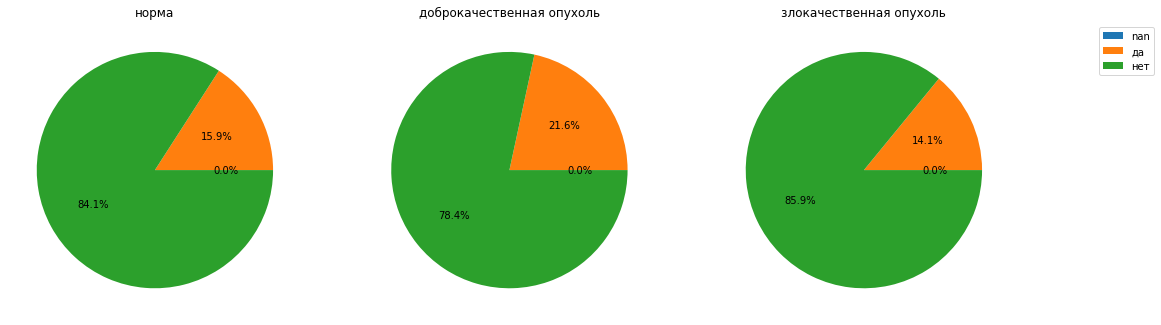

In [114]:
df.replace(
    {
        defs.QUESTION_30:
        {
            'не т':defs.NO,
            'нет ':defs.NO
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_30)

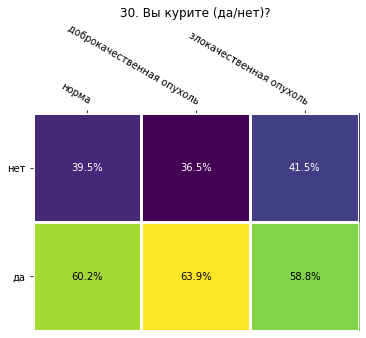

In [115]:
viz.plot_accuracy_matrix(df, defs.QUESTION_30)

### 31. Количество родов

In [116]:
set(df[defs.QUESTION_31].tolist())

{0, 1, 2, 3, 4, 6}

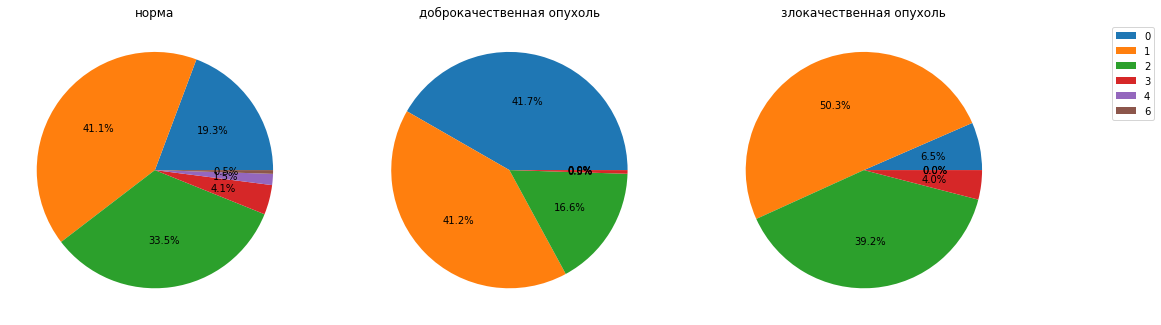

In [117]:
viz.plot_pies(df, defs.QUESTION_31)

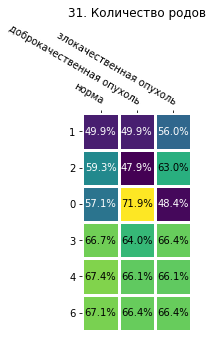

In [118]:
viz.plot_accuracy_matrix(df, defs.QUESTION_31)

### 32. Количество прерванных беременностей

In [119]:
set(df[defs.QUESTION_32].tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 12}

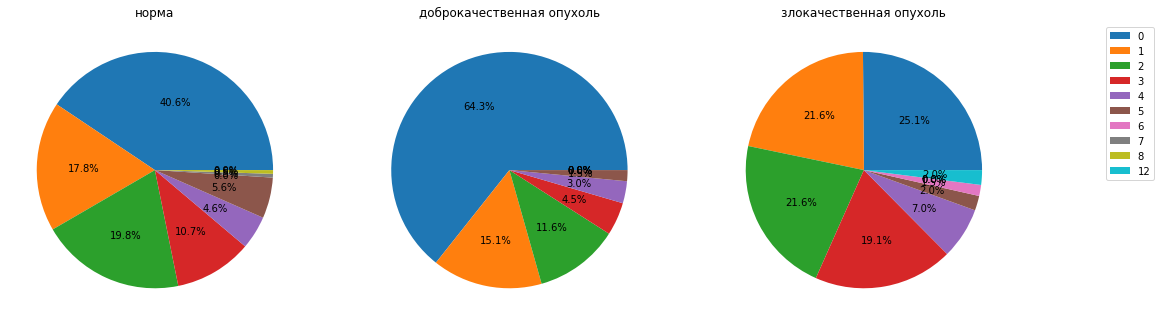

In [120]:
viz.plot_pies(df, defs.QUESTION_32)

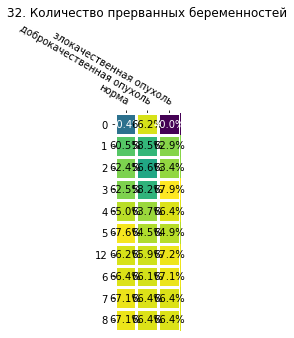

In [121]:
viz.plot_accuracy_matrix(df, defs.QUESTION_32)

### 33. Гинекологические заболевания (да/нет)

In [122]:
set(df[defs.QUESTION_33].tolist())

{'НЕТ', 'да', 'да ', 'есть', 'есть ', 'ней', 'нет', 'нте'}

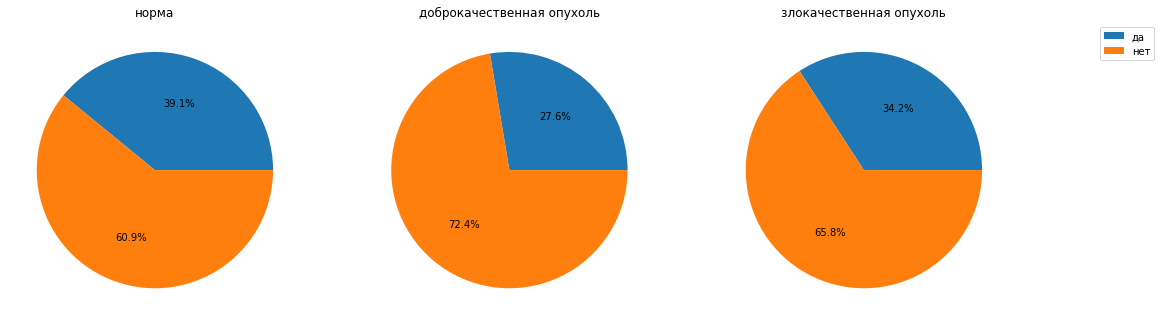

In [123]:
df.replace(
    {
        defs.QUESTION_33:
        {
            'НЕТ':defs.NO,
            'да ':defs.YES,
            'есть':defs.YES,
            'есть ':defs.YES,
            'ней':defs.NO,
            'нте':defs.NO,
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_33)

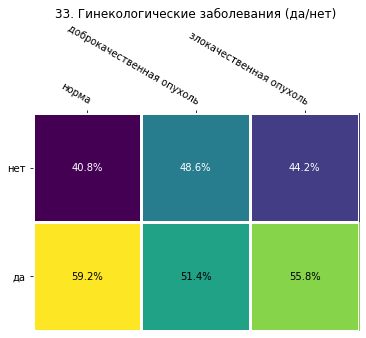

In [124]:
viz.plot_accuracy_matrix(df, defs.QUESTION_33)

### 34. Заболевания щитовидной железы (да/нет)

In [125]:
set(df[defs.QUESTION_34].tolist())

{'НЕТ', 'да', 'дв', 'есть', 'есть ', 'нет', 'нет '}

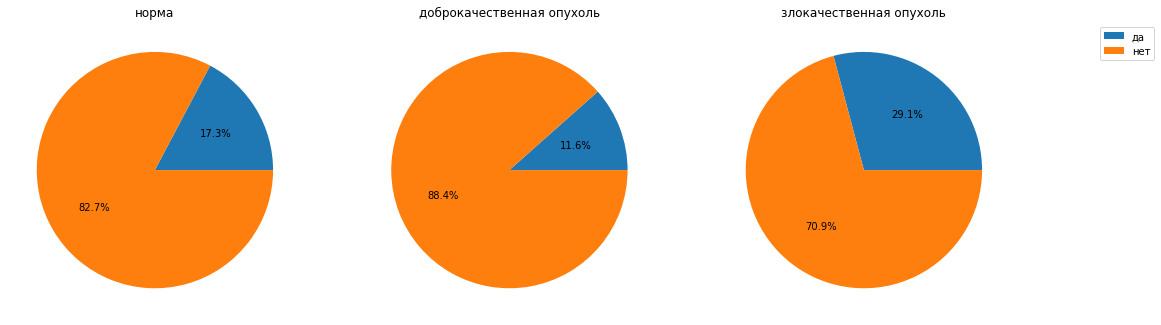

In [126]:
df.replace(
    {
        defs.QUESTION_34:
        {
            'НЕТ':defs.NO,
            'дв':defs.YES,
            'есть':defs.YES,
            'есть ':defs.YES,
            'нет ':defs.NO,
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_34)

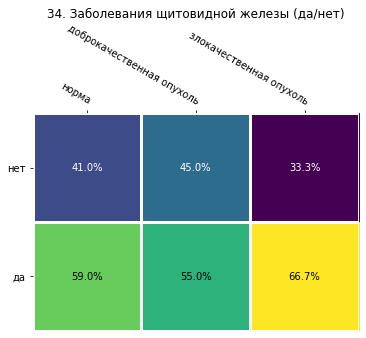

In [127]:
viz.plot_accuracy_matrix(df, defs.QUESTION_34)

### 35. Наследственность (да/нет)

In [128]:
set(df[defs.QUESTION_35].tolist())

{' нет', 'да', 'есть', 'нет'}

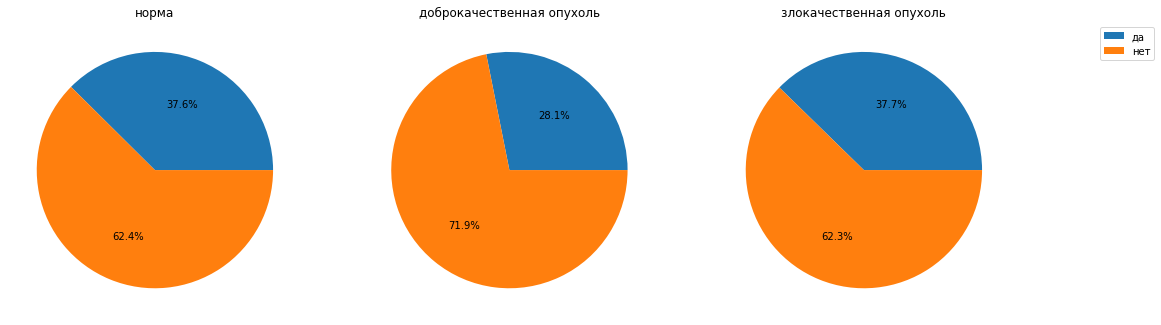

In [129]:
df.replace(
    {
        defs.QUESTION_35:
        {
            ' нет':defs.NO,
            'есть':defs.YES
        }
    }, inplace=True
)

viz.plot_pies(df, defs.QUESTION_35)

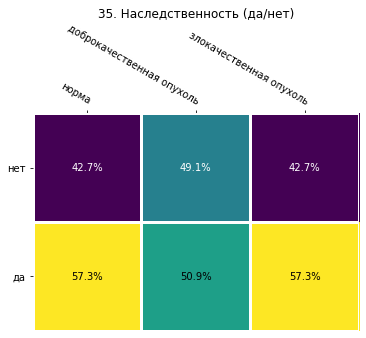

In [130]:
viz.plot_accuracy_matrix(df, defs.QUESTION_35)

## Работа с DataFrame 

### Удаление строк из DataFrame с недопустимыми пропусками

In [131]:
df = df[(df[defs.QUESTION_2] > 18) & (df[defs.QUESTION_2] < 85)]  # 595 - 2 = 593
df = df[df[defs.QUESTION_5].isin(defs.ANSWERS_5)]                 # 593 - 1 = 592
df = df[df[defs.QUESTION_12].isin(defs.ANSWERS_12)]               # 592 - 2 = 590
df = df[df[defs.QUESTION_15].isin([defs.YES, defs.NO])]           # 590 - 1 = 589
df = df[df[defs.QUESTION_16].isin(defs.ANSWERS_16_17_18)]         # 589 - 2 = 587
df = df[df[defs.QUESTION_17].isin(defs.ANSWERS_16_17_18)]         # 587 - 1 = 586
df = df[df[defs.QUESTION_25].isin(defs.ANSWERS_25)]               # 586 - 1 = 585
df = df[df[defs.QUESTION_27].isin(defs.ANSWERS_27)]               # 585 - 1 = 584

pd.set_option('max_columns', None)  # сбросит ограничение на количество выводимых столбцов
# pd.reset_option("max_columns")  # восстановит ограничение на количество выводимых столбцов

# df.info()
# df.head()

### Кодирование и приведение к типам, доступным для конвертации DataFrame в Dataset

In [132]:
def encode_categorical_columns(dataframe):
    for column_name in defs.CATEGORICAL_COLUMN_NAMES.keys():
        # Столбец в DataFrame становится "категориальным". Это означает, что ячейки в нём могут
        # принимать только значения из допустимых категорий либо np.NaN. Допустимые категории
        # определяются при создании такого столбца либо множеством различных ячеек, либо
        # специальным списком. Если допустимые категории определяются специальным списком и 
        # значение ячейки не входит в этот список, её значение становится np.NaN.
        dataframe[column_name] = pd.Categorical(dataframe[column_name], categories=defs.CATEGORICAL_COLUMN_NAMES[column_name])
        # Категории кодируются числами 0, 1, 2, ... np.NaN числом -1.
        dataframe[column_name] = dataframe[column_name].cat.codes
        # Приведение к типу, допустимому для конвертации DataFrame в Dataset.
        dataframe[column_name] = dataframe[column_name].astype('int64')


try:
    df = df.drop(columns=defs.QUESTION_8)  # включается в вопрос 9
except:
    pass
df.replace(
    {
        defs.QUESTION_9:
        {
            np.NaN:0
        }
    }, inplace=True
)
df[defs.QUESTION_2] = df[defs.QUESTION_2].astype('float64')
df[defs.QUESTION_4] = df[defs.QUESTION_4].astype('float64')
df[defs.QUESTION_22] = df[defs.QUESTION_22].astype('float64')
df[defs.QUESTION_24] = df[defs.QUESTION_24].astype('float64')
encode_categorical_columns(df)

# df.info()
# df.head()

In [133]:
df.to_excel(excel_writer=defs.PREPARED_DATA_PATH, index=False)